##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE234129**

file previously downloaded:
* GSE234129_barcodes.tsv.gz  
* GSE234129_count_matrix.mtx.gz  
* GSE234129_features.tsv.gz  
* GSE234129_meta.tsv.gz

##### renamed barcodes, features, and matrix files for import. 
##### unzipped the meta file with gunzip
##### dataset meant to contain data from 6 patients (some primary, mets, and blood), will need metadata file to seperate out samples/patients
                    


In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE234129')
getwd()

[1] "/scratch/user/s4436039/Nikita-project"

[1] "/scratch/user/s4436039/scdata/GSE234129"

In [2]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [4]:
#load all datasets
GAC.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE234129/GAC", gene.column=1)


In [5]:
head(colnames(GAC.data))

[1] "GACCTGGTCATACGGT_Ca0106-5" "TGGTTCCGTGTGACCC_Ca0106-5"
[3] "CCCTCCTGTAAAGGAG_Ca0327"   "GGCCGATAGGTCGGAT_Ca0327"  
[5] "CGCTTCAGTTACCGAT_FS0110-5" "GGGCATCAGCGTTTAC_FS0110-5"

In [6]:
#Add dataset info to colnames
colnames(GAC.data) <- paste0("GSE234129_GAC_", colnames(GAC.data))

In [7]:
head(colnames(GAC.data))

[1] "GSE234129_GAC_GACCTGGTCATACGGT_Ca0106-5"
[2] "GSE234129_GAC_TGGTTCCGTGTGACCC_Ca0106-5"
[3] "GSE234129_GAC_CCCTCCTGTAAAGGAG_Ca0327"  
[4] "GSE234129_GAC_GGCCGATAGGTCGGAT_Ca0327"  
[5] "GSE234129_GAC_CGCTTCAGTTACCGAT_FS0110-5"
[6] "GSE234129_GAC_GGGCATCAGCGTTTAC_FS0110-5"

In [14]:
meta <- read.csv("GSE234129_meta.tsv", sep = "\t")

In [15]:
head(meta)

cell_barcodes             patient sample     celltype
1 GACCTGGTCATACGGT_Ca0106-5 MDA_Pt2 MDA_Pt2-Ca DNT     
2 TGGTTCCGTGTGACCC_Ca0106-5 MDA_Pt2 MDA_Pt2-Ca CD8_C7  
3 CCCTCCTGTAAAGGAG_Ca0327   MDA_Pt9 MDA_Pt9-Ca CD8_C2  
4 GGCCGATAGGTCGGAT_Ca0327   MDA_Pt9 MDA_Pt9-Ca CD8_C0  
5 CGCTTCAGTTACCGAT_FS0110-5 MDA_Pt2 MDA_Pt2-As NK_C3   
6 GGGCATCAGCGTTTAC_FS0110-5 MDA_Pt2 MDA_Pt2-As CD8_C0

In [16]:
#create seperate seurat object for each sample
GAC <- CreateSeuratObject(counts = GAC.data, project = "GSE234129", min.features = 200, meta.data = meta)

In [18]:
head(GAC)
tail(GAC)

orig.ident nCount_RNA nFeature_RNA
GSE234129_GAC_GACCTGGTCATACGGT_Ca0106-5 GSE234129   710        390        
GSE234129_GAC_TGGTTCCGTGTGACCC_Ca0106-5 GSE234129   726        437        
GSE234129_GAC_CCCTCCTGTAAAGGAG_Ca0327   GSE234129  2742       1466        
GSE234129_GAC_GGCCGATAGGTCGGAT_Ca0327   GSE234129   640        443        
GSE234129_GAC_CGCTTCAGTTACCGAT_FS0110-5 GSE234129  2254       1249        
GSE234129_GAC_GGGCATCAGCGTTTAC_FS0110-5 GSE234129  2535       1118        
GSE234129_GAC_ACGAGGAAGGATATAC_FS0221-5 GSE234129   969        581        
GSE234129_GAC_GATCGATGTTCGCTAA_FS0221-5 GSE234129  2855       1295        
GSE234129_GAC_GGACAGAGTCGATTGT_FS0221-5 GSE234129  1114        595        
GSE234129_GAC_TAGAGCTGTAAATACG_FS0221-5 GSE234129   635        429        
                                        cell_barcodes             patient
GSE234129_GAC_GACCTGGTCATACGGT_Ca0106-5 GACCTGGTCATACGGT_Ca0106-5 MDA_Pt2
GSE234129_GAC_TGGTTCCGTGTGACCC_Ca0106-5 TGGTTCCGTGTGACCC_Ca0106-5 MDA_Pt2
GSE234129_GAC_CCCTCCTGTAAAGGAG_Ca0327   CCCTCCTGTAAAGGAG_Ca0327   MDA_Pt9
GSE234129_GAC_GGCCGATAGGTCGGAT_Ca0327   GGCCGATAGGTCGGAT_Ca0327   MDA_Pt9
GSE234129_GAC_CGCTTCAGTTACCGAT_FS0110-5 CGCTTCAGTTACCGAT_FS0110-5 MDA_Pt2
GSE234129_GAC_GGGCATCAGCGTTTAC_FS0110-5 GGGCATCAGCGTTTAC_FS0110-5 MDA_Pt2
GSE234129_GAC_ACGAGGAAGGATATAC_FS0221-5 ACGAGGAAGGATATAC_FS0221-5 MDA_Pt3
GSE234129_GAC_GATCGATGTTCGCTAA_FS0221-5 GATCGATGTTCGCTAA_FS0221-5 MDA_Pt3
GSE234129_GAC_GGACAGAGTCGATTGT_FS0221-5 GGACAGAGTCGATTGT_FS0221-5 MDA_Pt3
GSE234129_GAC_TAGAGCTGTAAATACG_FS0221-5 TAGAGCTGTAAATACG_FS0221-5 MDA_Pt3
                                        sample     celltype
GSE234129_GAC_GACCTGGTCATACGGT_Ca0106-5 MDA_Pt2-Ca DNT     
GSE234129_GAC_TGGTTCCGTGTGACCC_Ca0106-5 MDA_Pt2-Ca CD8_C7  
GSE234129_GAC_CCCTCCTGTAAAGGAG_Ca0327   MDA_Pt9-Ca CD8_C2  
GSE234129_GAC_GGCCGATAGGTCGGAT_Ca0327   MDA_Pt9-Ca CD8_C0  
GSE234129_GAC_CGCTTCAGTTACCGAT_FS0110-5 MDA_Pt2-As NK_C3   
GSE234129_GAC_GGGCATCAGCGTTTAC_FS0110-5 MDA_Pt2-As CD8_C0  
GSE234129_GAC_ACGAGGAAGGATATAC_FS0221-5 MDA_Pt3-As DNT     
GSE234129_GAC_GATCGATGTTCGCTAA_FS0221-5 MDA_Pt3-As NKT     
GSE234129_GAC_GGACAGAGTCGATTGT_FS0221-5 MDA_Pt3-As NKT     
GSE234129_GAC_TAGAGCTGTAAATACG_FS0221-5 MDA_Pt3-As DNT

orig.ident nCount_RNA nFeature_RNA
GSE234129_GAC_TGTTCCGCACAGCCCA_FS0313   GSE234129   8893      2865        
GSE234129_GAC_TTGAACGTCCTGTACC_FS0313   GSE234129   9871      3042        
GSE234129_GAC_CAGAGAGAGTCTTGCA_LCZY0313 GSE234129   5488      1944        
GSE234129_GAC_TCTATTGGTACCATCA_LCZY0313 GSE234129    293       252        
GSE234129_GAC_TGCCAAAGTTGGAGGT_LCZY0313 GSE234129   3685      1463        
GSE234129_GAC_CGAGAAGTCGCCTGTT_M1-0327  GSE234129   1062       458        
GSE234129_GAC_CTGGTCTTCACTCTTA_M1-0327  GSE234129  10457      3206        
GSE234129_GAC_TGGCCAGAGGCATGTG_M1-0327  GSE234129  10047      3215        
GSE234129_GAC_ACGCAGCAGTGCGTGA_PBMC0313 GSE234129   6558      2435        
GSE234129_GAC_GAACCTACATCACAAC_PBMC0313 GSE234129   8905      2988        
                                        cell_barcodes             patient
GSE234129_GAC_TGTTCCGCACAGCCCA_FS0313   TGTTCCGCACAGCCCA_FS0313   MDA_Pt5
GSE234129_GAC_TTGAACGTCCTGTACC_FS0313   TTGAACGTCCTGTACC_FS0313   MDA_Pt5
GSE234129_GAC_CAGAGAGAGTCTTGCA_LCZY0313 CAGAGAGAGTCTTGCA_LCZY0313 MDA_Pt5
GSE234129_GAC_TCTATTGGTACCATCA_LCZY0313 TCTATTGGTACCATCA_LCZY0313 MDA_Pt5
GSE234129_GAC_TGCCAAAGTTGGAGGT_LCZY0313 TGCCAAAGTTGGAGGT_LCZY0313 MDA_Pt5
GSE234129_GAC_CGAGAAGTCGCCTGTT_M1-0327  CGAGAAGTCGCCTGTT_M1-0327  MDA_Pt9
GSE234129_GAC_CTGGTCTTCACTCTTA_M1-0327  CTGGTCTTCACTCTTA_M1-0327  MDA_Pt9
GSE234129_GAC_TGGCCAGAGGCATGTG_M1-0327  TGGCCAGAGGCATGTG_M1-0327  MDA_Pt9
GSE234129_GAC_ACGCAGCAGTGCGTGA_PBMC0313 ACGCAGCAGTGCGTGA_PBMC0313 MDA_Pt5
GSE234129_GAC_GAACCTACATCACAAC_PBMC0313 GAACCTACATCACAAC_PBMC0313 MDA_Pt5
                                        sample       celltype 
GSE234129_GAC_TGTTCCGCACAGCCCA_FS0313   MDA_Pt5-As   pDCs     
GSE234129_GAC_TTGAACGTCCTGTACC_FS0313   MDA_Pt5-As   pDCs     
GSE234129_GAC_CAGAGAGAGTCTTGCA_LCZY0313 MDA_Pt5-Ov   pDCs     
GSE234129_GAC_TCTATTGGTACCATCA_LCZY0313 MDA_Pt5-Ov   Plasma_C1
GSE234129_GAC_TGCCAAAGTTGGAGGT_LCZY0313 MDA_Pt5-Ov   pDCs     
GSE234129_GAC_CGAGAAGTCGCCTGTT_M1-0327  MDA_Pt9-Li   DNT      
GSE234129_GAC_CTGGTCTTCACTCTTA_M1-0327  MDA_Pt9-Li   pDCs     
GSE234129_GAC_TGGCCAGAGGCATGTG_M1-0327  MDA_Pt9-Li   pDCs     
GSE234129_GAC_ACGCAGCAGTGCGTGA_PBMC0313 MDA_Pt5-PBMC pDCs     
GSE234129_GAC_GAACCTACATCACAAC_PBMC0313 MDA_Pt5-PBMC pDCs

In [28]:
table(Idents(GAC))
table(GAC$sample)


GSE234129 
    19488 


  MDA_Pt1-Ad   MDA_Pt1-Ca   MDA_Pt2-As   MDA_Pt2-Ca   MDA_Pt2-PB   MDA_Pt3-As 
         131          538         1992         1056         1595         3111 
  MDA_Pt3-Ca   MDA_Pt4-As   MDA_Pt4-Ca   MDA_Pt5-Ad   MDA_Pt5-As   MDA_Pt5-Ca 
        1046          620          424          532         1693          777 
  MDA_Pt5-Ov MDA_Pt5-PBMC   MDA_Pt9-Ad   MDA_Pt9-Ca   MDA_Pt9-Li 
        1477         1615          495         1268         1118 

##### six patients (Pt1, Pt2, Pt3, Pt4, Pt5, Pt9)

##### above metadata means the following:
* Ad --> Adjacent normal tissue --> KEEP
* Ca --> primary tumour --> KEEP
* As --> malignant ascites --> REMOVE
* PB --> PBMC (blood) --> REMOVE
* Ov --> ovarian metastasis --> KEEP
* PBMC --> PBMC (blood) --> REMOVE
* Li --> liver metastasis --> KEEP

In [29]:
#subsetting out wanted tissues and separating samples to add meta_data
Pt1_Ad <- subset(x = GAC, subset = sample == "MDA_Pt1-Ad")
Pt1_Ca <- subset(x = GAC, subset = sample == "MDA_Pt1-Ca")
Pt2_Ca <- subset(x = GAC, subset = sample == "MDA_Pt2-Ca")
Pt3_Ca <- subset(x = GAC, subset = sample == "MDA_Pt3-Ca")
Pt4_Ca <- subset(x = GAC, subset = sample == "MDA_Pt4-Ca")
Pt5_Ad <- subset(x = GAC, subset = sample == "MDA_Pt5-Ad")
Pt5_Ca <- subset(x = GAC, subset = sample == "MDA_Pt5-Ca")
Pt5_Ov <- subset(x = GAC, subset = sample == "MDA_Pt5-Ov")
Pt9_Ad <- subset(x = GAC, subset = sample == "MDA_Pt9-Ad")
Pt9_Ca <- subset(x = GAC, subset = sample == "MDA_Pt9-Ca")
Pt9_Li <- subset(x = GAC, subset = sample == "MDA_Pt9-Li")

In [32]:
#add metadata to each sample

Pt1_Ad@meta.data$sample_type <- "Healthy"
Pt1_Ad@meta.data$cancer_type <- "Healthy"
Pt1_Ad@meta.data$patient_id <- "Pt-1"
Pt1_Ad@meta.data$sample_id <- "GSE234129_Healthy_Pt-1"

Pt1_Ca@meta.data$sample_type <- "tumour"
Pt1_Ca@meta.data$cancer_type <- "GAC primary"
Pt1_Ca@meta.data$patient_id <- "Pt-1"
Pt1_Ca@meta.data$sample_id <- "GSE234129_GAC_Pt-1"

Pt2_Ca@meta.data$sample_type <- "tumour"
Pt2_Ca@meta.data$cancer_type <- "GAC primary"
Pt2_Ca@meta.data$patient_id <- "Pt-2"
Pt2_Ca@meta.data$sample_id <- "GSE234129_GAC_Pt-2"

Pt3_Ca@meta.data$sample_type <- "tumour"
Pt3_Ca@meta.data$cancer_type <- "GAC primary"
Pt3_Ca@meta.data$patient_id <- "Pt-3"
Pt3_Ca@meta.data$sample_id <- "GSE234129_GAC_Pt-3"

Pt4_Ca@meta.data$sample_type <- "tumour"
Pt4_Ca@meta.data$cancer_type <- "GAC primary"
Pt4_Ca@meta.data$patient_id <- "Pt-4"
Pt4_Ca@meta.data$sample_id <- "GSE234129_GAC_Pt-4"

Pt5_Ad@meta.data$sample_type <- "Healthy"
Pt5_Ad@meta.data$cancer_type <- "Healthy"
Pt5_Ad@meta.data$patient_id <- "Pt-5"
Pt5_Ad@meta.data$sample_id <- "GSE234129_Healthy_Pt-5"

Pt5_Ca@meta.data$sample_type <- "tumour"
Pt5_Ca@meta.data$cancer_type <- "GAC primary"
Pt5_Ca@meta.data$patient_id <- "Pt-5"
Pt5_Ca@meta.data$sample_id <- "GSE234129_GAC_Pt-5"

Pt5_Ov@meta.data$sample_type <- "tumour"
Pt5_Ov@meta.data$cancer_type <- "GAC ovarian mets"
Pt5_Ov@meta.data$patient_id <- "Pt-5"
Pt5_Ov@meta.data$sample_id <- "GSE234129_GAC-Ov-mets_Pt-5"

Pt9_Ad@meta.data$sample_type <- "Healthy"
Pt9_Ad@meta.data$cancer_type <- "Healthy"
Pt9_Ad@meta.data$patient_id <- "Pt-9"
Pt9_Ad@meta.data$sample_id <- "GSE234129_Healthy_Pt-9"

Pt9_Ca@meta.data$sample_type <- "tumour"
Pt9_Ca@meta.data$cancer_type <- "GAC primary"
Pt9_Ca@meta.data$patient_id <- "Pt-9"
Pt9_Ca@meta.data$sample_id <- "GSE234129_GAC_Pt-9"

Pt9_Li@meta.data$sample_type <- "tumour"
Pt9_Li@meta.data$cancer_type <- "GAC liver mets"
Pt9_Li@meta.data$patient_id <- "Pt-9"
Pt9_Li@meta.data$sample_id <- "GSE234129_GAC-Li-mets_Pt-9"

In [34]:
head(Pt1_Ad)
head(Pt3_Ca)
head(Pt9_Li)

orig.ident nCount_RNA nFeature_RNA
GSE234129_GAC_CGGACACGTTAGATGA_N-QJJ-5 GSE234129   899        492        
GSE234129_GAC_AAAGTAGGTAGGAGTC_N-QJJ-5 GSE234129  3355       1339        
GSE234129_GAC_AACCATGGTCGAATCT_N-QJJ-5 GSE234129  5055       2026        
GSE234129_GAC_AATCCAGCAAGTCTAC_N-QJJ-5 GSE234129  3593       1601        
GSE234129_GAC_ACAGCTACAGCTCGAC_N-QJJ-5 GSE234129  2917       1340        
GSE234129_GAC_ACCAGTATCCCTAACC_N-QJJ-5 GSE234129  3979       1585        
GSE234129_GAC_ACCTTTAGTGAAGGCT_N-QJJ-5 GSE234129  4149       1613        
GSE234129_GAC_ACGCAGCCAGCTGCAC_N-QJJ-5 GSE234129  2034       1046        
GSE234129_GAC_ACGGGCTCAAACTGCT_N-QJJ-5 GSE234129  2767       1257        
GSE234129_GAC_ACGGGCTTCCTCAATT_N-QJJ-5 GSE234129  1382        665        
                                       cell_barcodes            patient
GSE234129_GAC_CGGACACGTTAGATGA_N-QJJ-5 CGGACACGTTAGATGA_N-QJJ-5 MDA_Pt1
GSE234129_GAC_AAAGTAGGTAGGAGTC_N-QJJ-5 AAAGTAGGTAGGAGTC_N-QJJ-5 MDA_Pt1
GSE234129_GAC_AACCATGGTCGAATCT_N-QJJ-5 AACCATGGTCGAATCT_N-QJJ-5 MDA_Pt1
GSE234129_GAC_AATCCAGCAAGTCTAC_N-QJJ-5 AATCCAGCAAGTCTAC_N-QJJ-5 MDA_Pt1
GSE234129_GAC_ACAGCTACAGCTCGAC_N-QJJ-5 ACAGCTACAGCTCGAC_N-QJJ-5 MDA_Pt1
GSE234129_GAC_ACCAGTATCCCTAACC_N-QJJ-5 ACCAGTATCCCTAACC_N-QJJ-5 MDA_Pt1
GSE234129_GAC_ACCTTTAGTGAAGGCT_N-QJJ-5 ACCTTTAGTGAAGGCT_N-QJJ-5 MDA_Pt1
GSE234129_GAC_ACGCAGCCAGCTGCAC_N-QJJ-5 ACGCAGCCAGCTGCAC_N-QJJ-5 MDA_Pt1
GSE234129_GAC_ACGGGCTCAAACTGCT_N-QJJ-5 ACGGGCTCAAACTGCT_N-QJJ-5 MDA_Pt1
GSE234129_GAC_ACGGGCTTCCTCAATT_N-QJJ-5 ACGGGCTTCCTCAATT_N-QJJ-5 MDA_Pt1
                                       sample     celltype sample_type
GSE234129_GAC_CGGACACGTTAGATGA_N-QJJ-5 MDA_Pt1-Ad NK_C3    Healthy    
GSE234129_GAC_AAAGTAGGTAGGAGTC_N-QJJ-5 MDA_Pt1-Ad NKT      Healthy    
GSE234129_GAC_AACCATGGTCGAATCT_N-QJJ-5 MDA_Pt1-Ad NK_C7    Healthy    
GSE234129_GAC_AATCCAGCAAGTCTAC_N-QJJ-5 MDA_Pt1-Ad CD8_C1   Healthy    
GSE234129_GAC_ACAGCTACAGCTCGAC_N-QJJ-5 MDA_Pt1-Ad CD8_C2   Healthy    
GSE234129_GAC_ACCAGTATCCCTAACC_N-QJJ-5 MDA_Pt1-Ad CD8_C1   Healthy    
GSE234129_GAC_ACCTTTAGTGAAGGCT_N-QJJ-5 MDA_Pt1-Ad CD8_C1   Healthy    
GSE234129_GAC_ACGCAGCCAGCTGCAC_N-QJJ-5 MDA_Pt1-Ad CD4_C2   Healthy    
GSE234129_GAC_ACGGGCTCAAACTGCT_N-QJJ-5 MDA_Pt1-Ad NKT      Healthy    
GSE234129_GAC_ACGGGCTTCCTCAATT_N-QJJ-5 MDA_Pt1-Ad DNT      Healthy    
                                       cancer_type patient_id
GSE234129_GAC_CGGACACGTTAGATGA_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_AAAGTAGGTAGGAGTC_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_AACCATGGTCGAATCT_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_AATCCAGCAAGTCTAC_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_ACAGCTACAGCTCGAC_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_ACCAGTATCCCTAACC_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_ACCTTTAGTGAAGGCT_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_ACGCAGCCAGCTGCAC_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_ACGGGCTCAAACTGCT_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_ACGGGCTTCCTCAATT_N-QJJ-5 Healthy     Pt-1      
                                       sample_id             
GSE234129_GAC_CGGACACGTTAGATGA_N-QJJ-5 GSE234129_Healthy_Pt-1
GSE234129_GAC_AAAGTAGGTAGGAGTC_N-QJJ-5 GSE234129_Healthy_Pt-1
GSE234129_GAC_AACCATGGTCGAATCT_N-QJJ-5 GSE234129_Healthy_Pt-1
GSE234129_GAC_AATCCAGCAAGTCTAC_N-QJJ-5 GSE234129_Healthy_Pt-1
GSE234129_GAC_ACAGCTACAGCTCGAC_N-QJJ-5 GSE234129_Healthy_Pt-1
GSE234129_GAC_ACCAGTATCCCTAACC_N-QJJ-5 GSE234129_Healthy_Pt-1
GSE234129_GAC_ACCTTTAGTGAAGGCT_N-QJJ-5 GSE234129_Healthy_Pt-1
GSE234129_GAC_ACGCAGCCAGCTGCAC_N-QJJ-5 GSE234129_Healthy_Pt-1
GSE234129_GAC_ACGGGCTCAAACTGCT_N-QJJ-5 GSE234129_Healthy_Pt-1
GSE234129_GAC_ACGGGCTTCCTCAATT_N-QJJ-5 GSE234129_Healthy_Pt-1

orig.ident nCount_RNA nFeature_RNA
GSE234129_GAC_AAACGGGCACAGTCGC_Ca0221-5 GSE234129  5784       1890        
GSE234129_GAC_AAAGATGTCCGTTGTC_Ca0221-5 GSE234129  3635       1582        
GSE234129_GAC_AAAGCAAAGCCAGGAT_Ca0221-5 GSE234129  3320       1521        
GSE234129_GAC_AAAGCAAGTTTGGCGC_Ca0221-5 GSE234129  1720        851        
GSE234129_GAC_AAAGCAATCAGTGCAT_Ca0221-5 GSE234129  2750       1303        
GSE234129_GAC_AAAGTAGCACATAACC_Ca0221-5 GSE234129  4265       1901        
GSE234129_GAC_AAAGTAGGTAAGTAGT_Ca0221-5 GSE234129  2067        989        
GSE234129_GAC_AAATGCCAGTTTGCGT_Ca0221-5 GSE234129  4235       1556        
GSE234129_GAC_AACACGTAGCAGGCTA_Ca0221-5 GSE234129  6966       2735        
GSE234129_GAC_AACACGTCATGGTCTA_Ca0221-5 GSE234129  2973       1535        
                                        cell_barcodes             patient
GSE234129_GAC_AAACGGGCACAGTCGC_Ca0221-5 AAACGGGCACAGTCGC_Ca0221-5 MDA_Pt3
GSE234129_GAC_AAAGATGTCCGTTGTC_Ca0221-5 AAAGATGTCCGTTGTC_Ca0221-5 MDA_Pt3
GSE234129_GAC_AAAGCAAAGCCAGGAT_Ca0221-5 AAAGCAAAGCCAGGAT_Ca0221-5 MDA_Pt3
GSE234129_GAC_AAAGCAAGTTTGGCGC_Ca0221-5 AAAGCAAGTTTGGCGC_Ca0221-5 MDA_Pt3
GSE234129_GAC_AAAGCAATCAGTGCAT_Ca0221-5 AAAGCAATCAGTGCAT_Ca0221-5 MDA_Pt3
GSE234129_GAC_AAAGTAGCACATAACC_Ca0221-5 AAAGTAGCACATAACC_Ca0221-5 MDA_Pt3
GSE234129_GAC_AAAGTAGGTAAGTAGT_Ca0221-5 AAAGTAGGTAAGTAGT_Ca0221-5 MDA_Pt3
GSE234129_GAC_AAATGCCAGTTTGCGT_Ca0221-5 AAATGCCAGTTTGCGT_Ca0221-5 MDA_Pt3
GSE234129_GAC_AACACGTAGCAGGCTA_Ca0221-5 AACACGTAGCAGGCTA_Ca0221-5 MDA_Pt3
GSE234129_GAC_AACACGTCATGGTCTA_Ca0221-5 AACACGTCATGGTCTA_Ca0221-5 MDA_Pt3
                                        sample     celltype sample_type
GSE234129_GAC_AAACGGGCACAGTCGC_Ca0221-5 MDA_Pt3-Ca CD4_C2   tumour     
GSE234129_GAC_AAAGATGTCCGTTGTC_Ca0221-5 MDA_Pt3-Ca NKT      tumour     
GSE234129_GAC_AAAGCAAAGCCAGGAT_Ca0221-5 MDA_Pt3-Ca NK_C2    tumour     
GSE234129_GAC_AAAGCAAGTTTGGCGC_Ca0221-5 MDA_Pt3-Ca NK_C7    tumour     
GSE234129_GAC_AAAGCAATCAGTGCAT_Ca0221-5 MDA_Pt3-Ca CD8_C1   tumour     
GSE234129_GAC_AAAGTAGCACATAACC_Ca0221-5 MDA_Pt3-Ca CD4_C3   tumour     
GSE234129_GAC_AAAGTAGGTAAGTAGT_Ca0221-5 MDA_Pt3-Ca NKT      tumour     
GSE234129_GAC_AAATGCCAGTTTGCGT_Ca0221-5 MDA_Pt3-Ca CD4_C2   tumour     
GSE234129_GAC_AACACGTAGCAGGCTA_Ca0221-5 MDA_Pt3-Ca CD4_C6   tumour     
GSE234129_GAC_AACACGTCATGGTCTA_Ca0221-5 MDA_Pt3-Ca CD8_C1   tumour     
                                        cancer_type patient_id
GSE234129_GAC_AAACGGGCACAGTCGC_Ca0221-5 GAC primary Pt-3      
GSE234129_GAC_AAAGATGTCCGTTGTC_Ca0221-5 GAC primary Pt-3      
GSE234129_GAC_AAAGCAAAGCCAGGAT_Ca0221-5 GAC primary Pt-3      
GSE234129_GAC_AAAGCAAGTTTGGCGC_Ca0221-5 GAC primary Pt-3      
GSE234129_GAC_AAAGCAATCAGTGCAT_Ca0221-5 GAC primary Pt-3      
GSE234129_GAC_AAAGTAGCACATAACC_Ca0221-5 GAC primary Pt-3      
GSE234129_GAC_AAAGTAGGTAAGTAGT_Ca0221-5 GAC primary Pt-3      
GSE234129_GAC_AAATGCCAGTTTGCGT_Ca0221-5 GAC primary Pt-3      
GSE234129_GAC_AACACGTAGCAGGCTA_Ca0221-5 GAC primary Pt-3      
GSE234129_GAC_AACACGTCATGGTCTA_Ca0221-5 GAC primary Pt-3      
                                        sample_id         
GSE234129_GAC_AAACGGGCACAGTCGC_Ca0221-5 GSE234129_GAC_Pt-3
GSE234129_GAC_AAAGATGTCCGTTGTC_Ca0221-5 GSE234129_GAC_Pt-3
GSE234129_GAC_AAAGCAAAGCCAGGAT_Ca0221-5 GSE234129_GAC_Pt-3
GSE234129_GAC_AAAGCAAGTTTGGCGC_Ca0221-5 GSE234129_GAC_Pt-3
GSE234129_GAC_AAAGCAATCAGTGCAT_Ca0221-5 GSE234129_GAC_Pt-3
GSE234129_GAC_AAAGTAGCACATAACC_Ca0221-5 GSE234129_GAC_Pt-3
GSE234129_GAC_AAAGTAGGTAAGTAGT_Ca0221-5 GSE234129_GAC_Pt-3
GSE234129_GAC_AAATGCCAGTTTGCGT_Ca0221-5 GSE234129_GAC_Pt-3
GSE234129_GAC_AACACGTAGCAGGCTA_Ca0221-5 GSE234129_GAC_Pt-3
GSE234129_GAC_AACACGTCATGGTCTA_Ca0221-5 GSE234129_GAC_Pt-3

orig.ident nCount_RNA nFeature_RNA
GSE234129_GAC_CCCTCCTCAAATTGCC_M1-0327 GSE234129   359        262        
GSE234129_GAC_AAACCTGCACGTCTCT_M1-0327 GSE234129  3615       1584        
GSE234129_GAC_AAAGATGCAAACGTGG_M1-0327 GSE234129  1470        742        
GSE234129_GAC_AAAGATGGTCGAGTTT_M1-0327 GSE234129  3113       1247        
GSE234129_GAC_AAAGATGTCATCTGCC_M1-0327 GSE234129  3482       1427        
GSE234129_GAC_AAAGATGTCTCCTATA_M1-0327 GSE234129  2740       1197        
GSE234129_GAC_AAAGCAAGTGATAAAC_M1-0327 GSE234129  2402       1443        
GSE234129_GAC_AAAGTAGCACAAGTAA_M1-0327 GSE234129  3352       1412        
GSE234129_GAC_AAAGTAGGTCCGAGTC_M1-0327 GSE234129  3230       1301        
GSE234129_GAC_AAATGCCTCGGCGCTA_M1-0327 GSE234129  2801       1294        
                                       cell_barcodes            patient
GSE234129_GAC_CCCTCCTCAAATTGCC_M1-0327 CCCTCCTCAAATTGCC_M1-0327 MDA_Pt9
GSE234129_GAC_AAACCTGCACGTCTCT_M1-0327 AAACCTGCACGTCTCT_M1-0327 MDA_Pt9
GSE234129_GAC_AAAGATGCAAACGTGG_M1-0327 AAAGATGCAAACGTGG_M1-0327 MDA_Pt9
GSE234129_GAC_AAAGATGGTCGAGTTT_M1-0327 AAAGATGGTCGAGTTT_M1-0327 MDA_Pt9
GSE234129_GAC_AAAGATGTCATCTGCC_M1-0327 AAAGATGTCATCTGCC_M1-0327 MDA_Pt9
GSE234129_GAC_AAAGATGTCTCCTATA_M1-0327 AAAGATGTCTCCTATA_M1-0327 MDA_Pt9
GSE234129_GAC_AAAGCAAGTGATAAAC_M1-0327 AAAGCAAGTGATAAAC_M1-0327 MDA_Pt9
GSE234129_GAC_AAAGTAGCACAAGTAA_M1-0327 AAAGTAGCACAAGTAA_M1-0327 MDA_Pt9
GSE234129_GAC_AAAGTAGGTCCGAGTC_M1-0327 AAAGTAGGTCCGAGTC_M1-0327 MDA_Pt9
GSE234129_GAC_AAATGCCTCGGCGCTA_M1-0327 AAATGCCTCGGCGCTA_M1-0327 MDA_Pt9
                                       sample     celltype sample_type
GSE234129_GAC_CCCTCCTCAAATTGCC_M1-0327 MDA_Pt9-Li DNT      tumour     
GSE234129_GAC_AAACCTGCACGTCTCT_M1-0327 MDA_Pt9-Li NK_C2    tumour     
GSE234129_GAC_AAAGATGCAAACGTGG_M1-0327 MDA_Pt9-Li NKT      tumour     
GSE234129_GAC_AAAGATGGTCGAGTTT_M1-0327 MDA_Pt9-Li CD8_C4   tumour     
GSE234129_GAC_AAAGATGTCATCTGCC_M1-0327 MDA_Pt9-Li CD8_C2   tumour     
GSE234129_GAC_AAAGATGTCTCCTATA_M1-0327 MDA_Pt9-Li NK_C2    tumour     
GSE234129_GAC_AAAGCAAGTGATAAAC_M1-0327 MDA_Pt9-Li CD8_C2   tumour     
GSE234129_GAC_AAAGTAGCACAAGTAA_M1-0327 MDA_Pt9-Li CD4_C4   tumour     
GSE234129_GAC_AAAGTAGGTCCGAGTC_M1-0327 MDA_Pt9-Li NK_C2    tumour     
GSE234129_GAC_AAATGCCTCGGCGCTA_M1-0327 MDA_Pt9-Li CD8_C0   tumour     
                                       cancer_type    patient_id
GSE234129_GAC_CCCTCCTCAAATTGCC_M1-0327 GAC liver mets Pt-9      
GSE234129_GAC_AAACCTGCACGTCTCT_M1-0327 GAC liver mets Pt-9      
GSE234129_GAC_AAAGATGCAAACGTGG_M1-0327 GAC liver mets Pt-9      
GSE234129_GAC_AAAGATGGTCGAGTTT_M1-0327 GAC liver mets Pt-9      
GSE234129_GAC_AAAGATGTCATCTGCC_M1-0327 GAC liver mets Pt-9      
GSE234129_GAC_AAAGATGTCTCCTATA_M1-0327 GAC liver mets Pt-9      
GSE234129_GAC_AAAGCAAGTGATAAAC_M1-0327 GAC liver mets Pt-9      
GSE234129_GAC_AAAGTAGCACAAGTAA_M1-0327 GAC liver mets Pt-9      
GSE234129_GAC_AAAGTAGGTCCGAGTC_M1-0327 GAC liver mets Pt-9      
GSE234129_GAC_AAATGCCTCGGCGCTA_M1-0327 GAC liver mets Pt-9      
                                       sample_id                 
GSE234129_GAC_CCCTCCTCAAATTGCC_M1-0327 GSE234129_GAC-Li-mets_Pt-9
GSE234129_GAC_AAACCTGCACGTCTCT_M1-0327 GSE234129_GAC-Li-mets_Pt-9
GSE234129_GAC_AAAGATGCAAACGTGG_M1-0327 GSE234129_GAC-Li-mets_Pt-9
GSE234129_GAC_AAAGATGGTCGAGTTT_M1-0327 GSE234129_GAC-Li-mets_Pt-9
GSE234129_GAC_AAAGATGTCATCTGCC_M1-0327 GSE234129_GAC-Li-mets_Pt-9
GSE234129_GAC_AAAGATGTCTCCTATA_M1-0327 GSE234129_GAC-Li-mets_Pt-9
GSE234129_GAC_AAAGCAAGTGATAAAC_M1-0327 GSE234129_GAC-Li-mets_Pt-9
GSE234129_GAC_AAAGTAGCACAAGTAA_M1-0327 GSE234129_GAC-Li-mets_Pt-9
GSE234129_GAC_AAAGTAGGTCCGAGTC_M1-0327 GSE234129_GAC-Li-mets_Pt-9
GSE234129_GAC_AAATGCCTCGGCGCTA_M1-0327 GSE234129_GAC-Li-mets_Pt-9

In [35]:
#merge seurat objects back together
GAC2 <- merge(Pt1_Ad, y = c(Pt1_Ca, Pt2_Ca, Pt3_Ca, Pt4_Ca, Pt5_Ad, Pt5_Ca, Pt5_Ov, Pt9_Ad, Pt9_Ca, Pt9_Li))

In [36]:
GAC2
head(GAC2@meta.data)
tail(GAC2@meta.data)

An object of class Seurat 
27176 features across 8862 samples within 1 assay 
Active assay: RNA (27176 features, 0 variable features)
 11 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11

orig.ident nCount_RNA nFeature_RNA
GSE234129_GAC_CGGACACGTTAGATGA_N-QJJ-5 GSE234129   899        492        
GSE234129_GAC_AAAGTAGGTAGGAGTC_N-QJJ-5 GSE234129  3355       1339        
GSE234129_GAC_AACCATGGTCGAATCT_N-QJJ-5 GSE234129  5055       2026        
GSE234129_GAC_AATCCAGCAAGTCTAC_N-QJJ-5 GSE234129  3593       1601        
GSE234129_GAC_ACAGCTACAGCTCGAC_N-QJJ-5 GSE234129  2917       1340        
GSE234129_GAC_ACCAGTATCCCTAACC_N-QJJ-5 GSE234129  3979       1585        
                                       cell_barcodes            patient
GSE234129_GAC_CGGACACGTTAGATGA_N-QJJ-5 CGGACACGTTAGATGA_N-QJJ-5 MDA_Pt1
GSE234129_GAC_AAAGTAGGTAGGAGTC_N-QJJ-5 AAAGTAGGTAGGAGTC_N-QJJ-5 MDA_Pt1
GSE234129_GAC_AACCATGGTCGAATCT_N-QJJ-5 AACCATGGTCGAATCT_N-QJJ-5 MDA_Pt1
GSE234129_GAC_AATCCAGCAAGTCTAC_N-QJJ-5 AATCCAGCAAGTCTAC_N-QJJ-5 MDA_Pt1
GSE234129_GAC_ACAGCTACAGCTCGAC_N-QJJ-5 ACAGCTACAGCTCGAC_N-QJJ-5 MDA_Pt1
GSE234129_GAC_ACCAGTATCCCTAACC_N-QJJ-5 ACCAGTATCCCTAACC_N-QJJ-5 MDA_Pt1
                                       sample     celltype sample_type
GSE234129_GAC_CGGACACGTTAGATGA_N-QJJ-5 MDA_Pt1-Ad NK_C3    Healthy    
GSE234129_GAC_AAAGTAGGTAGGAGTC_N-QJJ-5 MDA_Pt1-Ad NKT      Healthy    
GSE234129_GAC_AACCATGGTCGAATCT_N-QJJ-5 MDA_Pt1-Ad NK_C7    Healthy    
GSE234129_GAC_AATCCAGCAAGTCTAC_N-QJJ-5 MDA_Pt1-Ad CD8_C1   Healthy    
GSE234129_GAC_ACAGCTACAGCTCGAC_N-QJJ-5 MDA_Pt1-Ad CD8_C2   Healthy    
GSE234129_GAC_ACCAGTATCCCTAACC_N-QJJ-5 MDA_Pt1-Ad CD8_C1   Healthy    
                                       cancer_type patient_id
GSE234129_GAC_CGGACACGTTAGATGA_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_AAAGTAGGTAGGAGTC_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_AACCATGGTCGAATCT_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_AATCCAGCAAGTCTAC_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_ACAGCTACAGCTCGAC_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_ACCAGTATCCCTAACC_N-QJJ-5 Healthy     Pt-1      
                                       sample_id             
GSE234129_GAC_CGGACACGTTAGATGA_N-QJJ-5 GSE234129_Healthy_Pt-1
GSE234129_GAC_AAAGTAGGTAGGAGTC_N-QJJ-5 GSE234129_Healthy_Pt-1
GSE234129_GAC_AACCATGGTCGAATCT_N-QJJ-5 GSE234129_Healthy_Pt-1
GSE234129_GAC_AATCCAGCAAGTCTAC_N-QJJ-5 GSE234129_Healthy_Pt-1
GSE234129_GAC_ACAGCTACAGCTCGAC_N-QJJ-5 GSE234129_Healthy_Pt-1
GSE234129_GAC_ACCAGTATCCCTAACC_N-QJJ-5 GSE234129_Healthy_Pt-1

orig.ident nCount_RNA nFeature_RNA
GSE234129_GAC_TGGTTCCGTGGTCCGT_M1-0327 GSE234129   2136       912        
GSE234129_GAC_TTATGCTGTCATACTG_M1-0327 GSE234129   3981      1507        
GSE234129_GAC_TTGCCGTAGTAGCCGA_M1-0327 GSE234129   4427      1610        
GSE234129_GAC_CGAGAAGTCGCCTGTT_M1-0327 GSE234129   1062       458        
GSE234129_GAC_CTGGTCTTCACTCTTA_M1-0327 GSE234129  10457      3206        
GSE234129_GAC_TGGCCAGAGGCATGTG_M1-0327 GSE234129  10047      3215        
                                       cell_barcodes            patient
GSE234129_GAC_TGGTTCCGTGGTCCGT_M1-0327 TGGTTCCGTGGTCCGT_M1-0327 MDA_Pt9
GSE234129_GAC_TTATGCTGTCATACTG_M1-0327 TTATGCTGTCATACTG_M1-0327 MDA_Pt9
GSE234129_GAC_TTGCCGTAGTAGCCGA_M1-0327 TTGCCGTAGTAGCCGA_M1-0327 MDA_Pt9
GSE234129_GAC_CGAGAAGTCGCCTGTT_M1-0327 CGAGAAGTCGCCTGTT_M1-0327 MDA_Pt9
GSE234129_GAC_CTGGTCTTCACTCTTA_M1-0327 CTGGTCTTCACTCTTA_M1-0327 MDA_Pt9
GSE234129_GAC_TGGCCAGAGGCATGTG_M1-0327 TGGCCAGAGGCATGTG_M1-0327 MDA_Pt9
                                       sample     celltype  sample_type
GSE234129_GAC_TGGTTCCGTGGTCCGT_M1-0327 MDA_Pt9-Li B cell_C2 tumour     
GSE234129_GAC_TTATGCTGTCATACTG_M1-0327 MDA_Pt9-Li B cell_C3 tumour     
GSE234129_GAC_TTGCCGTAGTAGCCGA_M1-0327 MDA_Pt9-Li B cell_C3 tumour     
GSE234129_GAC_CGAGAAGTCGCCTGTT_M1-0327 MDA_Pt9-Li DNT       tumour     
GSE234129_GAC_CTGGTCTTCACTCTTA_M1-0327 MDA_Pt9-Li pDCs      tumour     
GSE234129_GAC_TGGCCAGAGGCATGTG_M1-0327 MDA_Pt9-Li pDCs      tumour     
                                       cancer_type    patient_id
GSE234129_GAC_TGGTTCCGTGGTCCGT_M1-0327 GAC liver mets Pt-9      
GSE234129_GAC_TTATGCTGTCATACTG_M1-0327 GAC liver mets Pt-9      
GSE234129_GAC_TTGCCGTAGTAGCCGA_M1-0327 GAC liver mets Pt-9      
GSE234129_GAC_CGAGAAGTCGCCTGTT_M1-0327 GAC liver mets Pt-9      
GSE234129_GAC_CTGGTCTTCACTCTTA_M1-0327 GAC liver mets Pt-9      
GSE234129_GAC_TGGCCAGAGGCATGTG_M1-0327 GAC liver mets Pt-9      
                                       sample_id                 
GSE234129_GAC_TGGTTCCGTGGTCCGT_M1-0327 GSE234129_GAC-Li-mets_Pt-9
GSE234129_GAC_TTATGCTGTCATACTG_M1-0327 GSE234129_GAC-Li-mets_Pt-9
GSE234129_GAC_TTGCCGTAGTAGCCGA_M1-0327 GSE234129_GAC-Li-mets_Pt-9
GSE234129_GAC_CGAGAAGTCGCCTGTT_M1-0327 GSE234129_GAC-Li-mets_Pt-9
GSE234129_GAC_CTGGTCTTCACTCTTA_M1-0327 GSE234129_GAC-Li-mets_Pt-9
GSE234129_GAC_TGGCCAGAGGCATGTG_M1-0327 GSE234129_GAC-Li-mets_Pt-9

## here onwards not edited

In [18]:
head(NPC06@meta.data) 
head(NPC15@meta.data) 

orig.ident nCount_RNA
GSE162025_NPC_SC_1806_Tumor_cDNA_ACACTGAAGAAGGTTT GSE162025  1258      
GSE162025_NPC_SC_1806_Tumor_cDNA_ACGATGTTCTTAGAGC GSE162025  1081      
GSE162025_NPC_SC_1806_Tumor_cDNA_AGAATAGAGTACCGGA GSE162025  1044      
GSE162025_NPC_SC_1806_Tumor_cDNA_AGACGTTCAATGCCAT GSE162025  1571      
GSE162025_NPC_SC_1806_Tumor_cDNA_AGGTCATCAGAGCCAA GSE162025  1207      
GSE162025_NPC_SC_1806_Tumor_cDNA_ATGTGTGCATTCTCAT GSE162025  1001      
                                                  nFeature_RNA sample_type
GSE162025_NPC_SC_1806_Tumor_cDNA_ACACTGAAGAAGGTTT 757          tumour     
GSE162025_NPC_SC_1806_Tumor_cDNA_ACGATGTTCTTAGAGC 633          tumour     
GSE162025_NPC_SC_1806_Tumor_cDNA_AGAATAGAGTACCGGA 665          tumour     
GSE162025_NPC_SC_1806_Tumor_cDNA_AGACGTTCAATGCCAT 858          tumour     
GSE162025_NPC_SC_1806_Tumor_cDNA_AGGTCATCAGAGCCAA 748          tumour     
GSE162025_NPC_SC_1806_Tumor_cDNA_ATGTGTGCATTCTCAT 654          tumour     
                                                  cancer_type patient_id
GSE162025_NPC_SC_1806_Tumor_cDNA_ACACTGAAGAAGGTTT NPC         pt-1806   
GSE162025_NPC_SC_1806_Tumor_cDNA_ACGATGTTCTTAGAGC NPC         pt-1806   
GSE162025_NPC_SC_1806_Tumor_cDNA_AGAATAGAGTACCGGA NPC         pt-1806   
GSE162025_NPC_SC_1806_Tumor_cDNA_AGACGTTCAATGCCAT NPC         pt-1806   
GSE162025_NPC_SC_1806_Tumor_cDNA_AGGTCATCAGAGCCAA NPC         pt-1806   
GSE162025_NPC_SC_1806_Tumor_cDNA_ATGTGTGCATTCTCAT NPC         pt-1806   
                                                  sample_id         
GSE162025_NPC_SC_1806_Tumor_cDNA_ACACTGAAGAAGGTTT GSE162025_NPC_1806
GSE162025_NPC_SC_1806_Tumor_cDNA_ACGATGTTCTTAGAGC GSE162025_NPC_1806
GSE162025_NPC_SC_1806_Tumor_cDNA_AGAATAGAGTACCGGA GSE162025_NPC_1806
GSE162025_NPC_SC_1806_Tumor_cDNA_AGACGTTCAATGCCAT GSE162025_NPC_1806
GSE162025_NPC_SC_1806_Tumor_cDNA_AGGTCATCAGAGCCAA GSE162025_NPC_1806
GSE162025_NPC_SC_1806_Tumor_cDNA_ATGTGTGCATTCTCAT GSE162025_NPC_1806

orig.ident nCount_RNA
GSE162025_NPC_SC_1815_Tumor_cDNA_TGAGAGGTCTTGTATC GSE162025  1346      
GSE162025_NPC_SC_1815_Tumor_cDNA_AAAGTAGAGAAGATTC GSE162025  1126      
GSE162025_NPC_SC_1815_Tumor_cDNA_AAATGCCGTTCACCTC GSE162025  1290      
GSE162025_NPC_SC_1815_Tumor_cDNA_ACAGCTATCTCTAAGG GSE162025  1467      
GSE162025_NPC_SC_1815_Tumor_cDNA_ACTGAACAGTTCGATC GSE162025  1752      
GSE162025_NPC_SC_1815_Tumor_cDNA_ACTGAACGTTAGTGGG GSE162025  1268      
                                                  nFeature_RNA sample_type
GSE162025_NPC_SC_1815_Tumor_cDNA_TGAGAGGTCTTGTATC 967          tumour     
GSE162025_NPC_SC_1815_Tumor_cDNA_AAAGTAGAGAAGATTC 687          tumour     
GSE162025_NPC_SC_1815_Tumor_cDNA_AAATGCCGTTCACCTC 890          tumour     
GSE162025_NPC_SC_1815_Tumor_cDNA_ACAGCTATCTCTAAGG 793          tumour     
GSE162025_NPC_SC_1815_Tumor_cDNA_ACTGAACAGTTCGATC 996          tumour     
GSE162025_NPC_SC_1815_Tumor_cDNA_ACTGAACGTTAGTGGG 835          tumour     
                                                  cancer_type patient_id
GSE162025_NPC_SC_1815_Tumor_cDNA_TGAGAGGTCTTGTATC NPC         pt-1815   
GSE162025_NPC_SC_1815_Tumor_cDNA_AAAGTAGAGAAGATTC NPC         pt-1815   
GSE162025_NPC_SC_1815_Tumor_cDNA_AAATGCCGTTCACCTC NPC         pt-1815   
GSE162025_NPC_SC_1815_Tumor_cDNA_ACAGCTATCTCTAAGG NPC         pt-1815   
GSE162025_NPC_SC_1815_Tumor_cDNA_ACTGAACAGTTCGATC NPC         pt-1815   
GSE162025_NPC_SC_1815_Tumor_cDNA_ACTGAACGTTAGTGGG NPC         pt-1815   
                                                  sample_id         
GSE162025_NPC_SC_1815_Tumor_cDNA_TGAGAGGTCTTGTATC GSE162025_NPC_1815
GSE162025_NPC_SC_1815_Tumor_cDNA_AAAGTAGAGAAGATTC GSE162025_NPC_1815
GSE162025_NPC_SC_1815_Tumor_cDNA_AAATGCCGTTCACCTC GSE162025_NPC_1815
GSE162025_NPC_SC_1815_Tumor_cDNA_ACAGCTATCTCTAAGG GSE162025_NPC_1815
GSE162025_NPC_SC_1815_Tumor_cDNA_ACTGAACAGTTCGATC GSE162025_NPC_1815
GSE162025_NPC_SC_1815_Tumor_cDNA_ACTGAACGTTAGTGGG GSE162025_NPC_1815

In [19]:
#Merge seurat objects
NPC <- merge(NPC02, y = c(NPC05, NPC06, NPC07, NPC08, NPC10, NPC11, NPC13, NPC15, NPC16), project = "GSE162025")

In [20]:
NPC
head(NPC@meta.data)
tail(NPC@meta.data)

An object of class Seurat 
20930 features across 82622 samples within 1 assay 
Active assay: RNA (20930 features, 0 variable features)
 10 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10

orig.ident nCount_RNA nFeature_RNA
GSE162025_npc_1802_tumor_CTGTTTATCACTCTTA GSE162025  1363        833        
GSE162025_npc_1802_tumor_AACCGCGAGTACGCGA GSE162025  1629        916        
GSE162025_npc_1802_tumor_AGAGCTTAGGCCATAG GSE162025  1467        907        
GSE162025_npc_1802_tumor_CAGCAGCTCGTCACGG GSE162025  1003        614        
GSE162025_npc_1802_tumor_CTCTGGTTCCGCGTTT GSE162025  2210       1229        
GSE162025_npc_1802_tumor_GACGTGCCAAGTCATC GSE162025  1646        952        
                                          sample_type cancer_type patient_id
GSE162025_npc_1802_tumor_CTGTTTATCACTCTTA tumour      NPC         pt-1802   
GSE162025_npc_1802_tumor_AACCGCGAGTACGCGA tumour      NPC         pt-1802   
GSE162025_npc_1802_tumor_AGAGCTTAGGCCATAG tumour      NPC         pt-1802   
GSE162025_npc_1802_tumor_CAGCAGCTCGTCACGG tumour      NPC         pt-1802   
GSE162025_npc_1802_tumor_CTCTGGTTCCGCGTTT tumour      NPC         pt-1802   
GSE162025_npc_1802_tumor_GACGTGCCAAGTCATC tumour      NPC         pt-1802   
                                          sample_id         
GSE162025_npc_1802_tumor_CTGTTTATCACTCTTA GSE162025_NPC_1802
GSE162025_npc_1802_tumor_AACCGCGAGTACGCGA GSE162025_NPC_1802
GSE162025_npc_1802_tumor_AGAGCTTAGGCCATAG GSE162025_NPC_1802
GSE162025_npc_1802_tumor_CAGCAGCTCGTCACGG GSE162025_NPC_1802
GSE162025_npc_1802_tumor_CTCTGGTTCCGCGTTT GSE162025_NPC_1802
GSE162025_npc_1802_tumor_GACGTGCCAAGTCATC GSE162025_NPC_1802

orig.ident nCount_RNA
GSE162025_NPC_SC_1816_Tumor_cDNA_TGTCCCAGTGAGTGAC GSE162025  31056     
GSE162025_NPC_SC_1816_Tumor_cDNA_TTAGGCAGTCGCTTTC GSE162025  24721     
GSE162025_NPC_SC_1816_Tumor_cDNA_TTCGGTCGTTACAGAA GSE162025  21555     
GSE162025_NPC_SC_1816_Tumor_cDNA_TTGCCGTCATGCCTAA GSE162025  33533     
GSE162025_NPC_SC_1816_Tumor_cDNA_TTGGCAAAGTAGTGCG GSE162025  22668     
GSE162025_NPC_SC_1816_Tumor_cDNA_TTTGCGCAGGCAATTA GSE162025  24823     
                                                  nFeature_RNA sample_type
GSE162025_NPC_SC_1816_Tumor_cDNA_TGTCCCAGTGAGTGAC 5659         tumour     
GSE162025_NPC_SC_1816_Tumor_cDNA_TTAGGCAGTCGCTTTC 5022         tumour     
GSE162025_NPC_SC_1816_Tumor_cDNA_TTCGGTCGTTACAGAA 4656         tumour     
GSE162025_NPC_SC_1816_Tumor_cDNA_TTGCCGTCATGCCTAA 5446         tumour     
GSE162025_NPC_SC_1816_Tumor_cDNA_TTGGCAAAGTAGTGCG 4613         tumour     
GSE162025_NPC_SC_1816_Tumor_cDNA_TTTGCGCAGGCAATTA 5141         tumour     
                                                  cancer_type patient_id
GSE162025_NPC_SC_1816_Tumor_cDNA_TGTCCCAGTGAGTGAC NPC         pt-1816   
GSE162025_NPC_SC_1816_Tumor_cDNA_TTAGGCAGTCGCTTTC NPC         pt-1816   
GSE162025_NPC_SC_1816_Tumor_cDNA_TTCGGTCGTTACAGAA NPC         pt-1816   
GSE162025_NPC_SC_1816_Tumor_cDNA_TTGCCGTCATGCCTAA NPC         pt-1816   
GSE162025_NPC_SC_1816_Tumor_cDNA_TTGGCAAAGTAGTGCG NPC         pt-1816   
GSE162025_NPC_SC_1816_Tumor_cDNA_TTTGCGCAGGCAATTA NPC         pt-1816   
                                                  sample_id         
GSE162025_NPC_SC_1816_Tumor_cDNA_TGTCCCAGTGAGTGAC GSE162025_NPC_1816
GSE162025_NPC_SC_1816_Tumor_cDNA_TTAGGCAGTCGCTTTC GSE162025_NPC_1816
GSE162025_NPC_SC_1816_Tumor_cDNA_TTCGGTCGTTACAGAA GSE162025_NPC_1816
GSE162025_NPC_SC_1816_Tumor_cDNA_TTGCCGTCATGCCTAA GSE162025_NPC_1816
GSE162025_NPC_SC_1816_Tumor_cDNA_TTGGCAAAGTAGTGCG GSE162025_NPC_1816
GSE162025_NPC_SC_1816_Tumor_cDNA_TTTGCGCAGGCAATTA GSE162025_NPC_1816

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


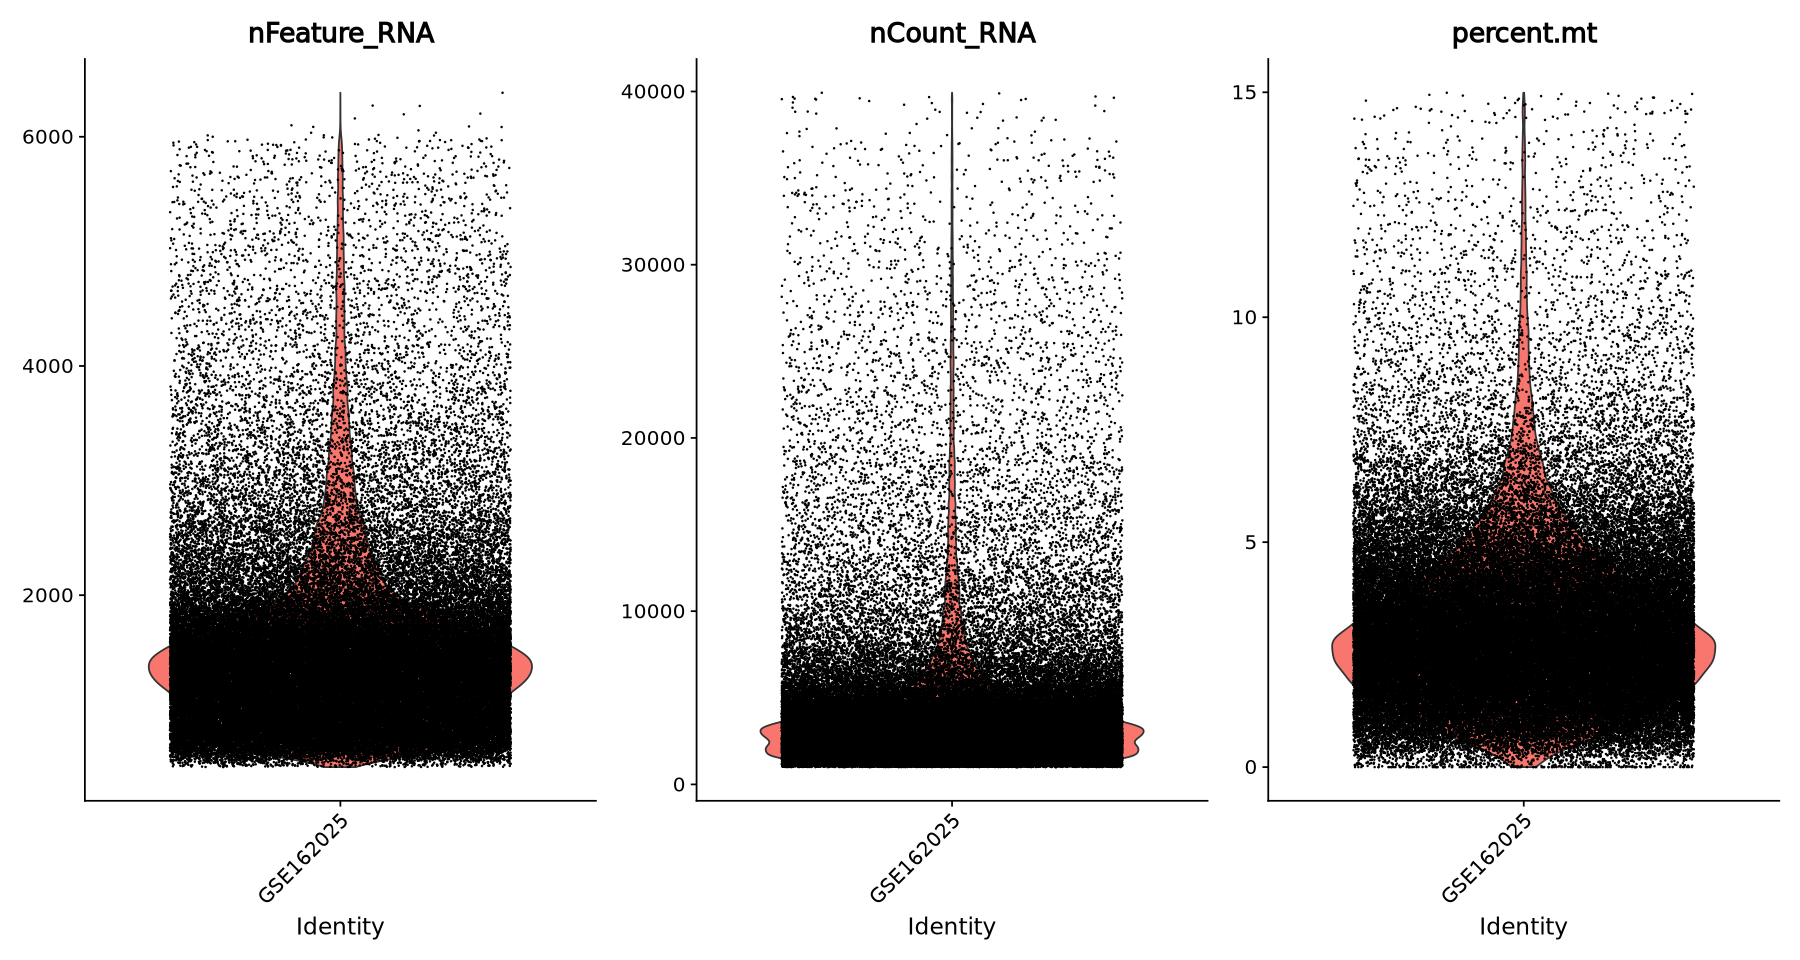

In [21]:
#QC Steps 
NPC[["percent.mt"]] <- PercentageFeatureSet(NPC, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(NPC, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [22]:
#Normalise the data
NPC <- NormalizeData(NPC)
#Find variable features
NPC <- FindVariableFeatures(NPC, selection.method = "vst", nfeatures = 2000)
#Scale the data
NPC <- ScaleData(NPC, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run PCA
NPC <- RunPCA(NPC, features = VariableFeatures(object = NPC))

Normalizing layer: counts.1

Normalizing layer: counts.2

Normalizing layer: counts.3

Normalizing layer: counts.4

Normalizing layer: counts.5

Normalizing layer: counts.6

Normalizing layer: counts.7

Normalizing layer: counts.8

Normalizing layer: counts.9

Normalizing layer: counts.10

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3

Finding variable features for layer counts.4

Finding variable features for layer counts.5

Finding variable features for layer counts.6

Finding variable features for layer counts.7

Finding variable features for layer counts.8

Finding variable features for layer counts.9

Finding variable features for layer counts.10

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  KRT19, KRT8, CLDN4, FXYD3, EPCAM, UBD, LTBR, CLDN1, KRT5, CD9 
	   CST3, DSP, CSTA, ELF3, KRT15, TACSTD2, GPNMB, SFN, S100A14, SOX2 
	   MDK, KRT18, NUPR1, 

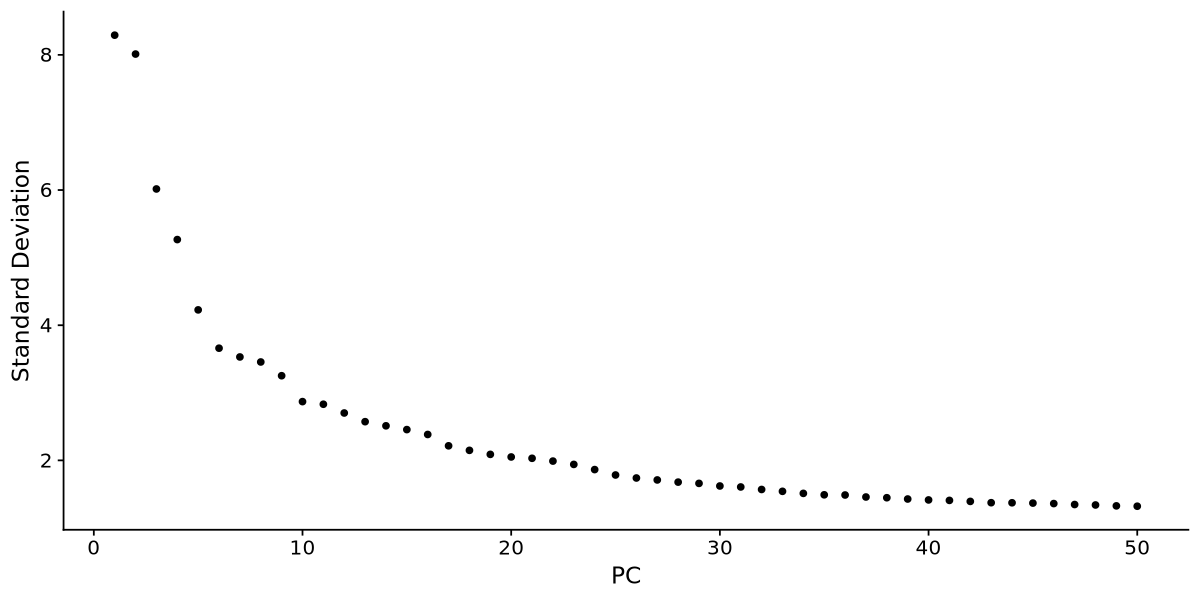

In [23]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(NPC, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [24]:
#Find neighbours (make sure number matches no. features chosen above)
NPC <- FindNeighbors(NPC, dims = 1:40)

Computing nearest neighbor graph



Computing SNN



In [25]:
#Run UMAP
NPC <- RunUMAP(NPC, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


09:05:44 UMAP embedding parameters a = 0.9922 b = 1.112

09:05:44 Read 82622 rows and found 40 numeric columns

09:05:44 Using Annoy for neighbor search, n_neighbors = 30

09:05:44 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:05:49 Writing NN index file to temp file /scratch/temp/9432344/Rtmpjp6Crb/file2ebcdc5851ad81

09:05:49 Searching Annoy index using 1 thread, search_k = 3000

09:06:11 Annoy recall = 100%

09:06:12 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

09:06:14 Initializing from normalized Laplacian + noise (using RSpectra)

09:06:19 Commencing optimization for 200 epochs, with 3728338 positive edges

09:06:48 Optimization finished



In [30]:
#Cluster, resolution here set to 0.2
NPC <- FindClusters(NPC, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 82622
Number of edges: 2727690

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9502
Number of communities: 14
Elapsed time: 19 seconds


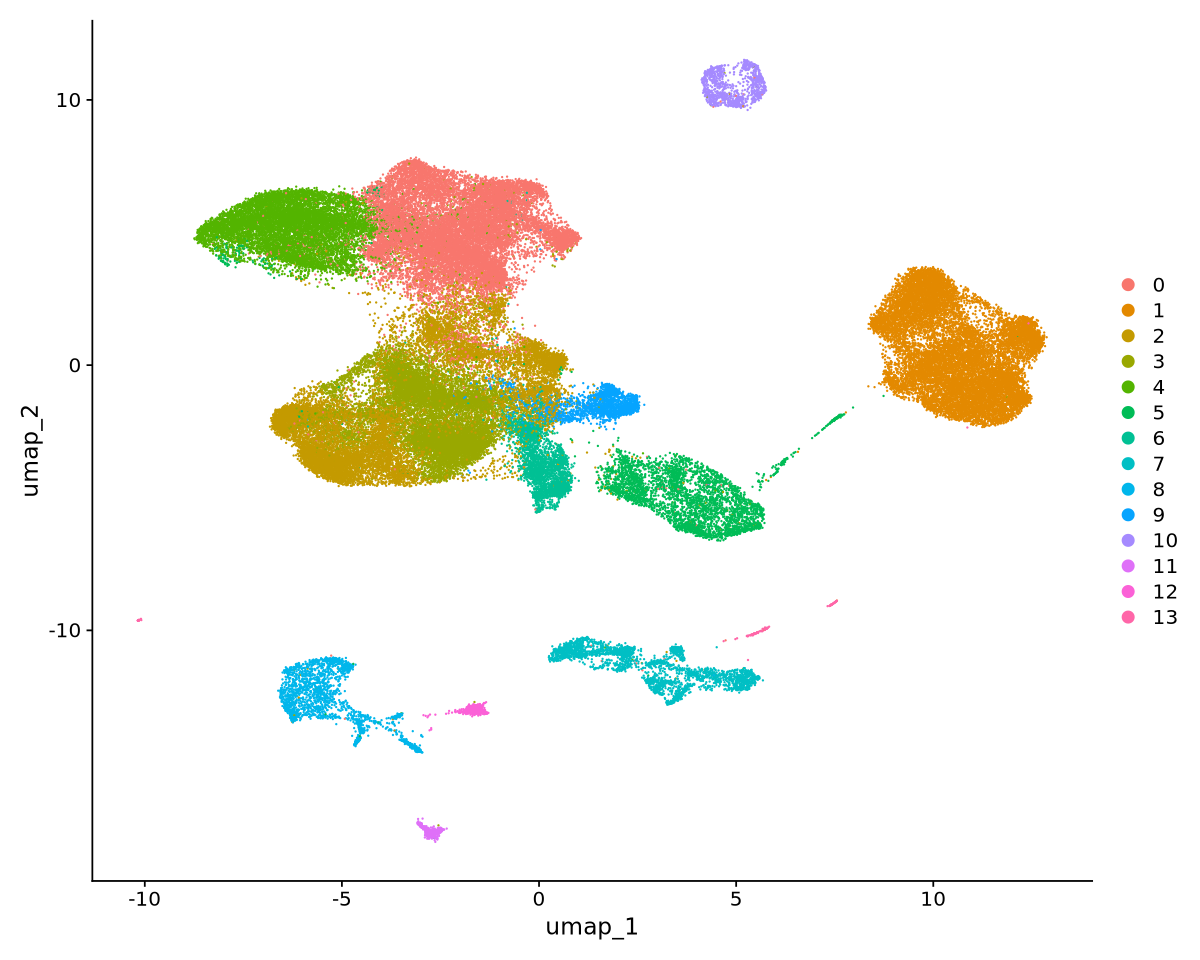

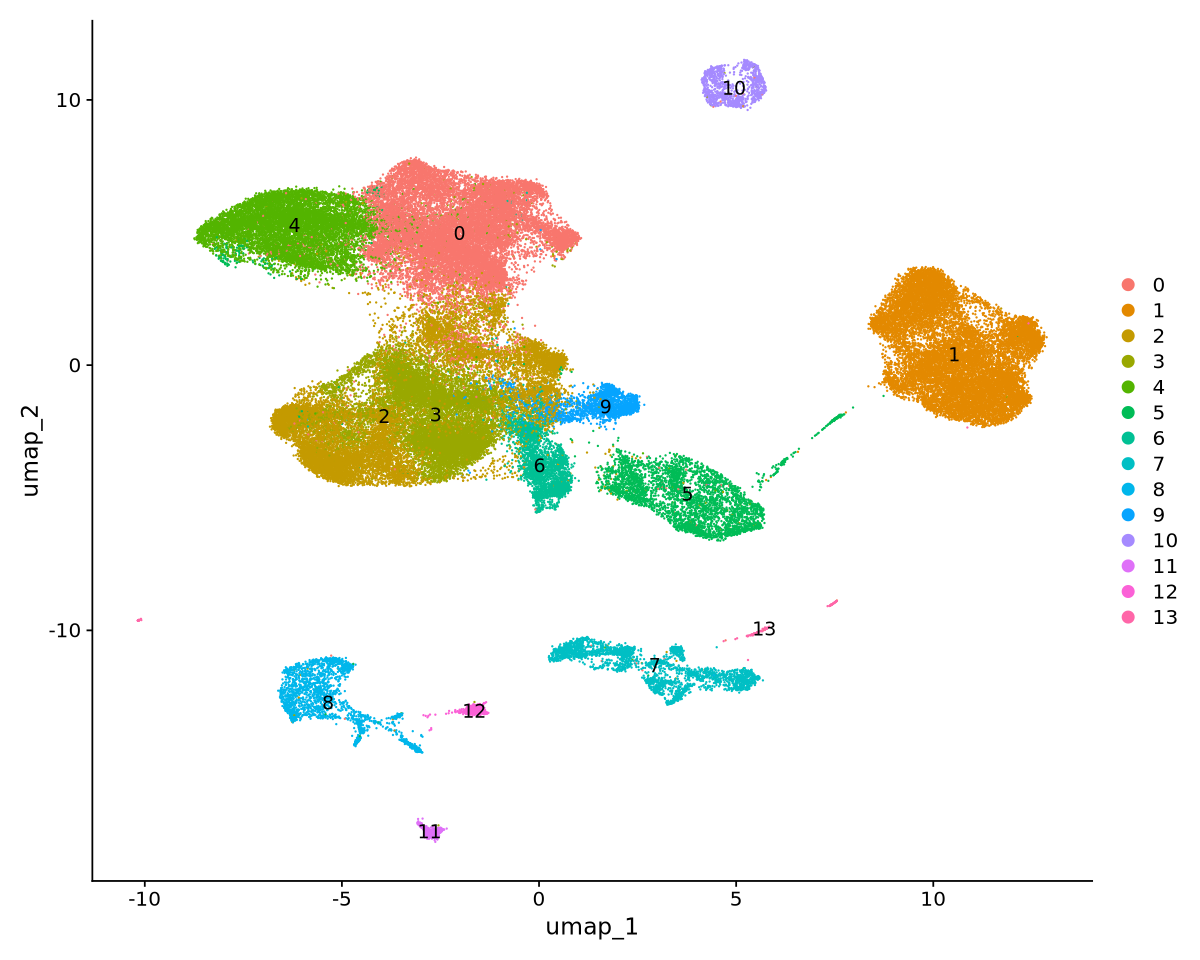

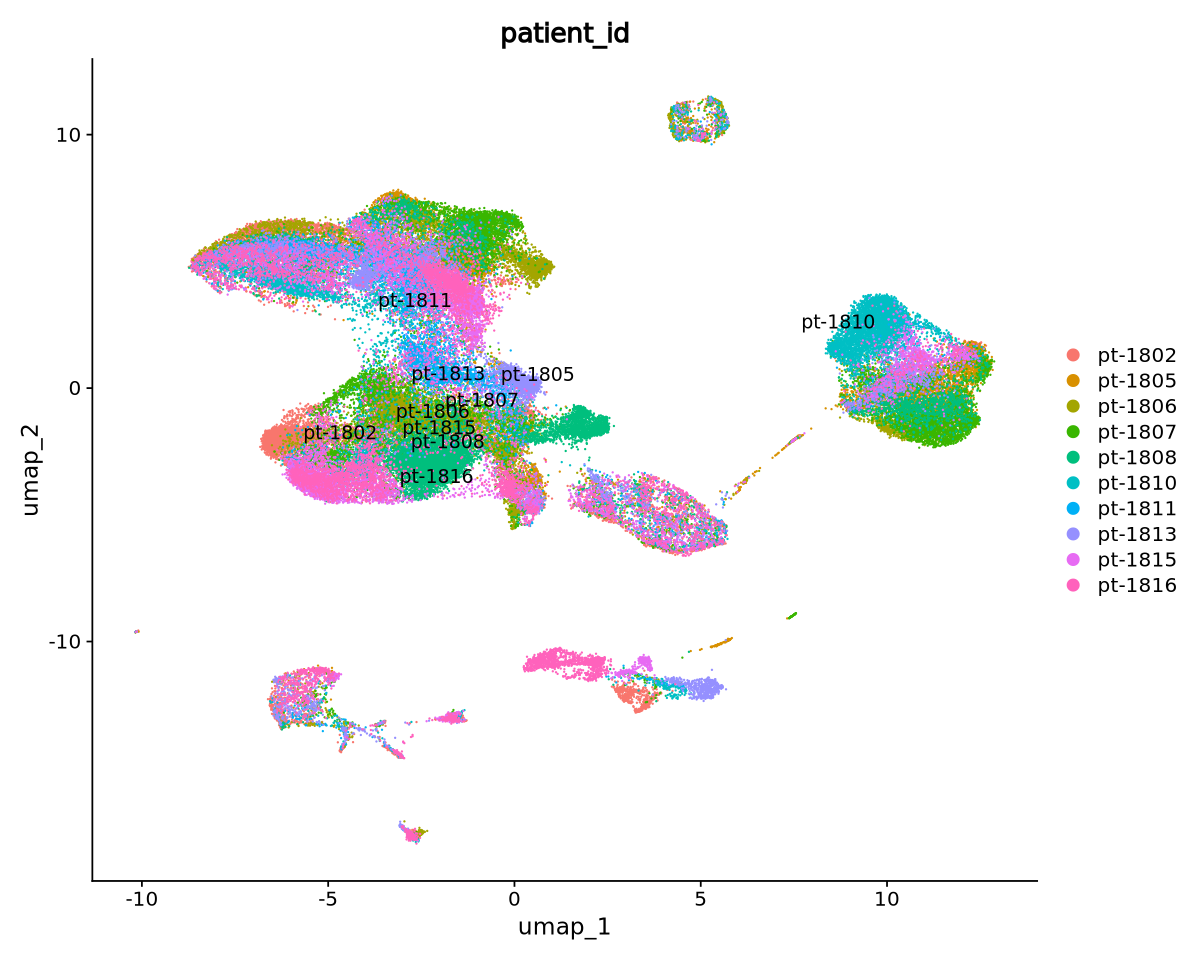

In [31]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(NPC, reduction = "umap")
DimPlot(NPC, reduction = "umap", label=TRUE)
DimPlot(NPC, reduction = "umap", label=TRUE, group = "patient_id")

In [32]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(NPC, file = "/scratch/user/s4436039/scdata/GSE162025/GSE162025.RDS")

#### Next part of code is about determining which cluster is the myeloid cells

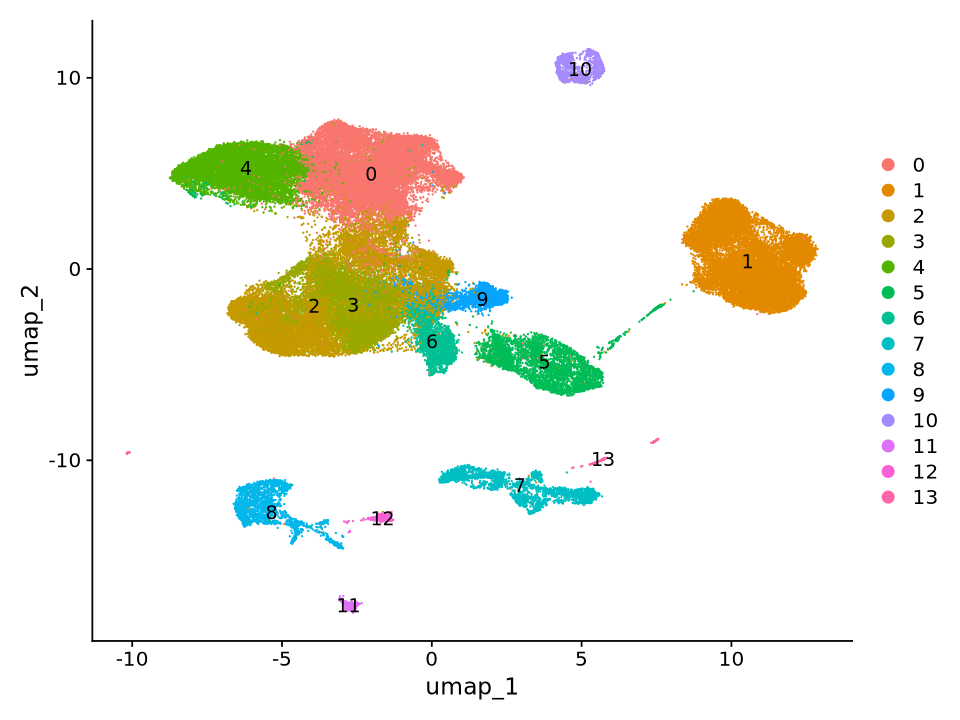

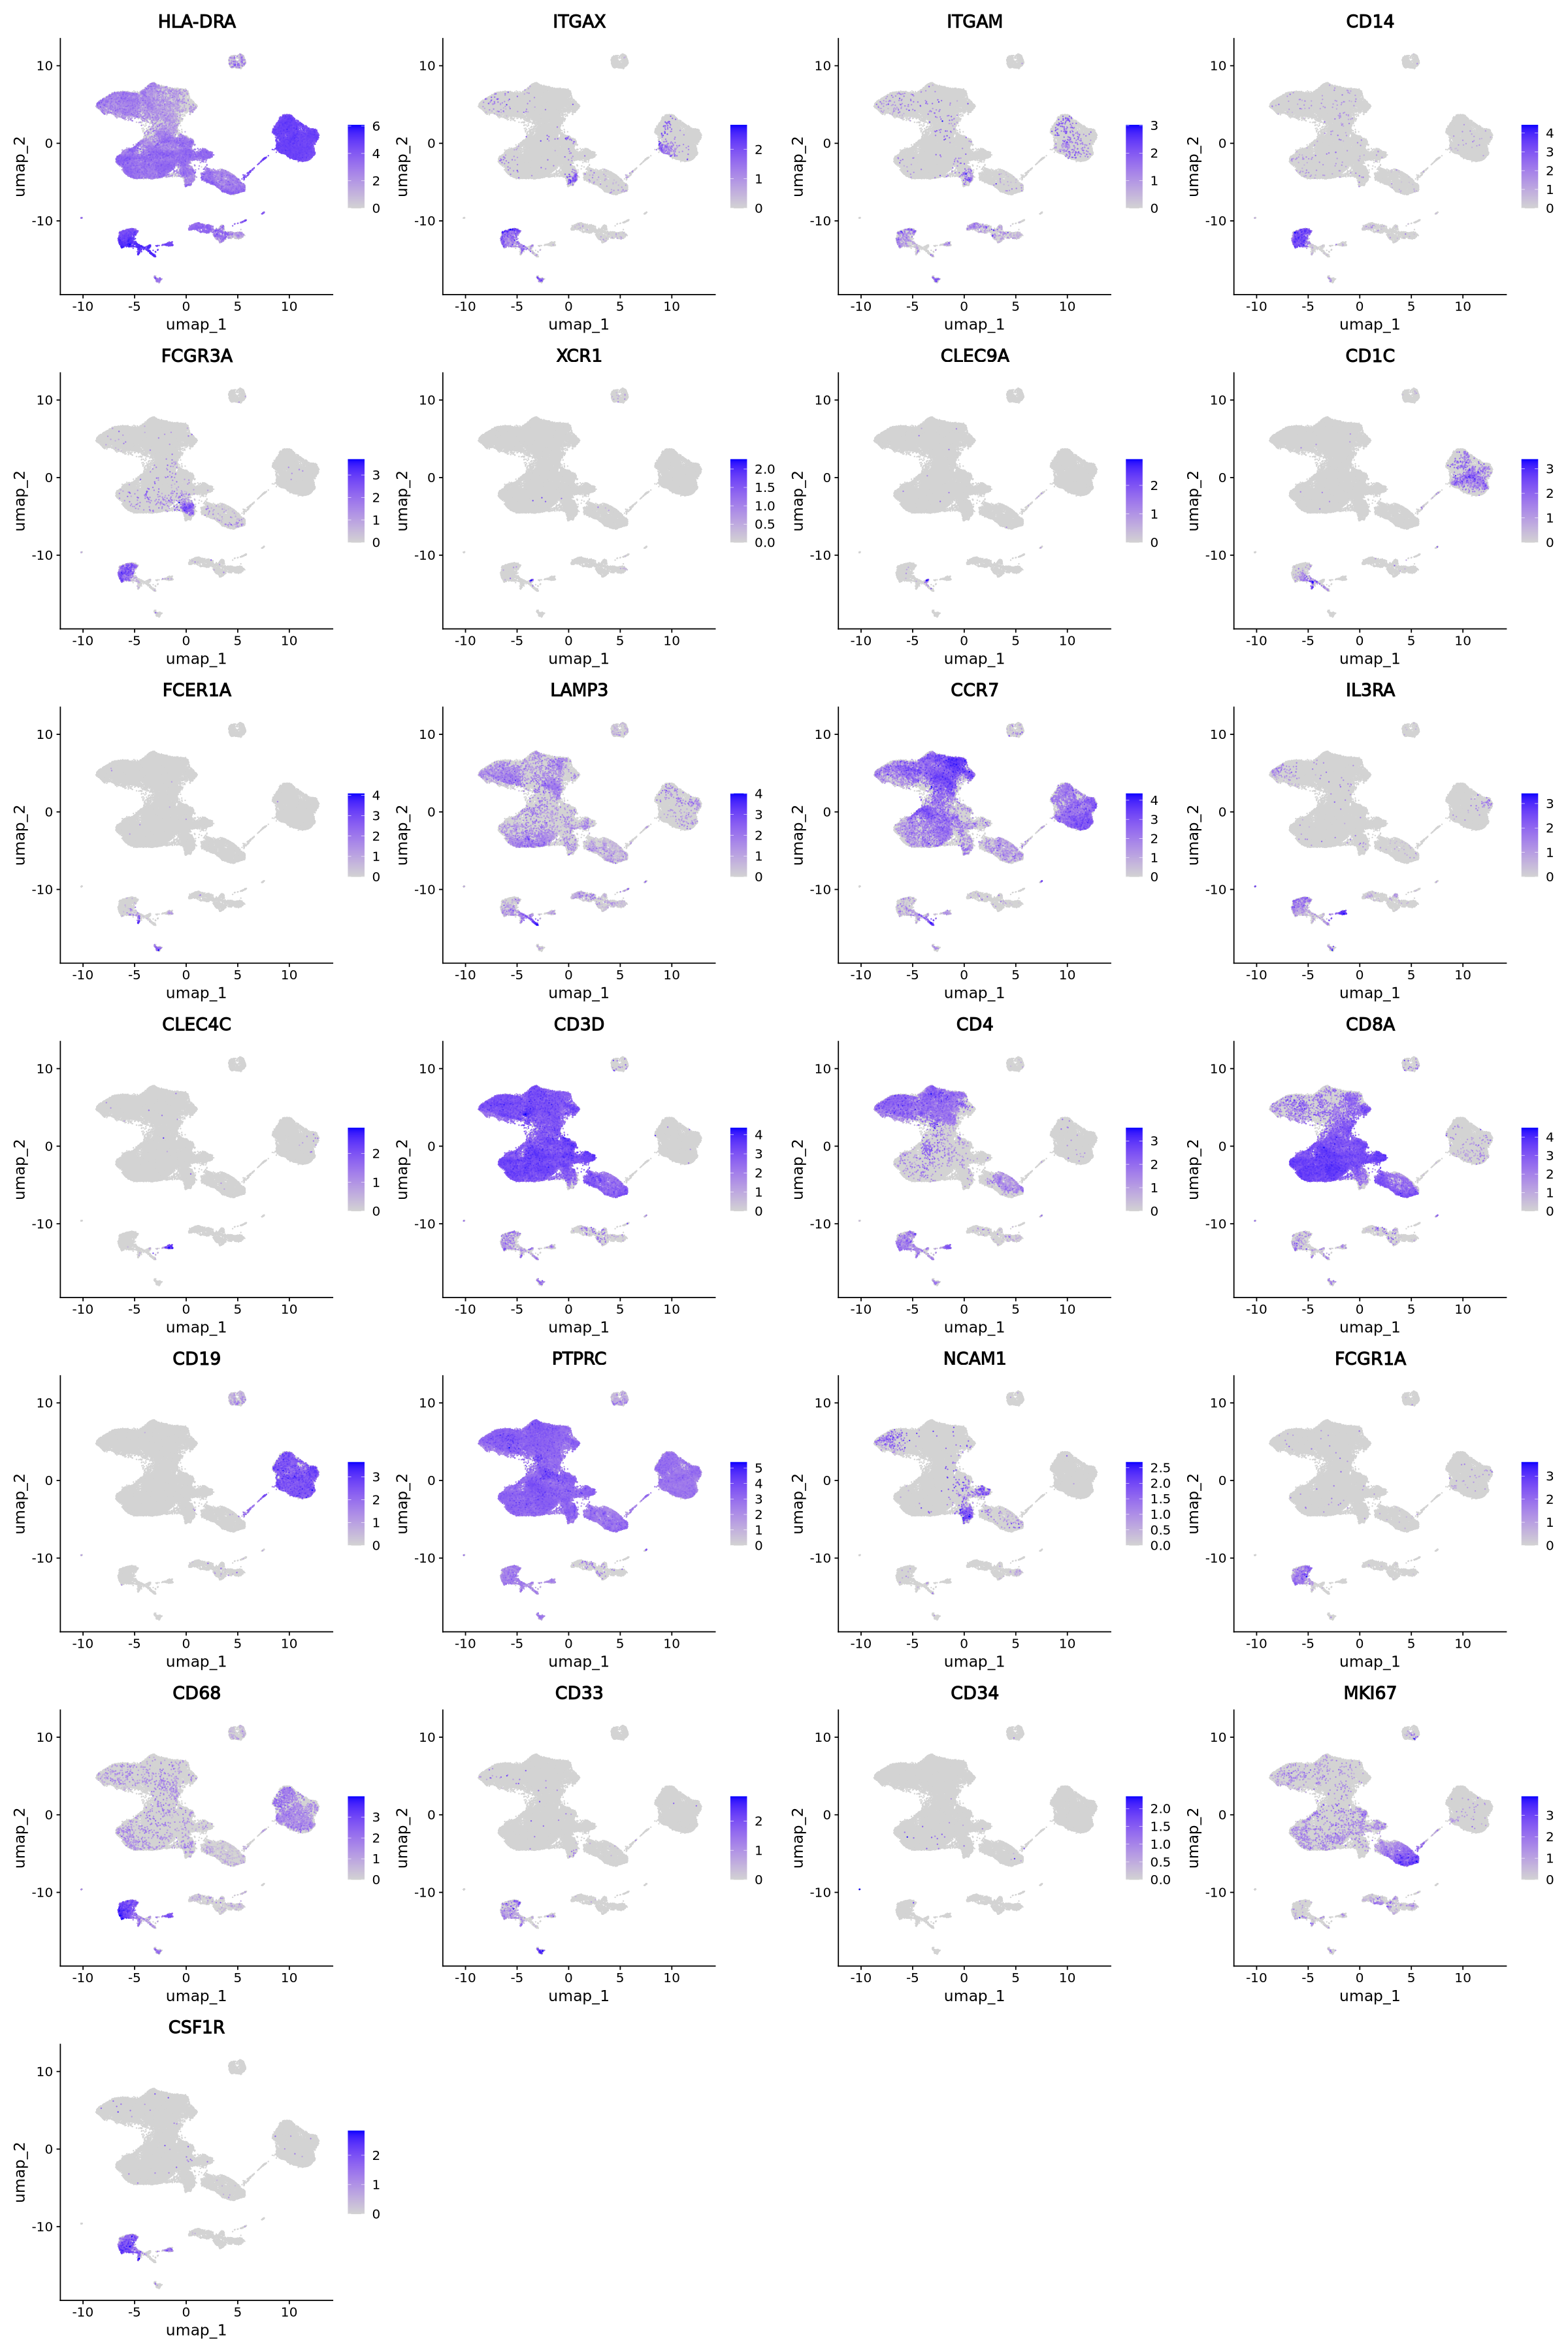

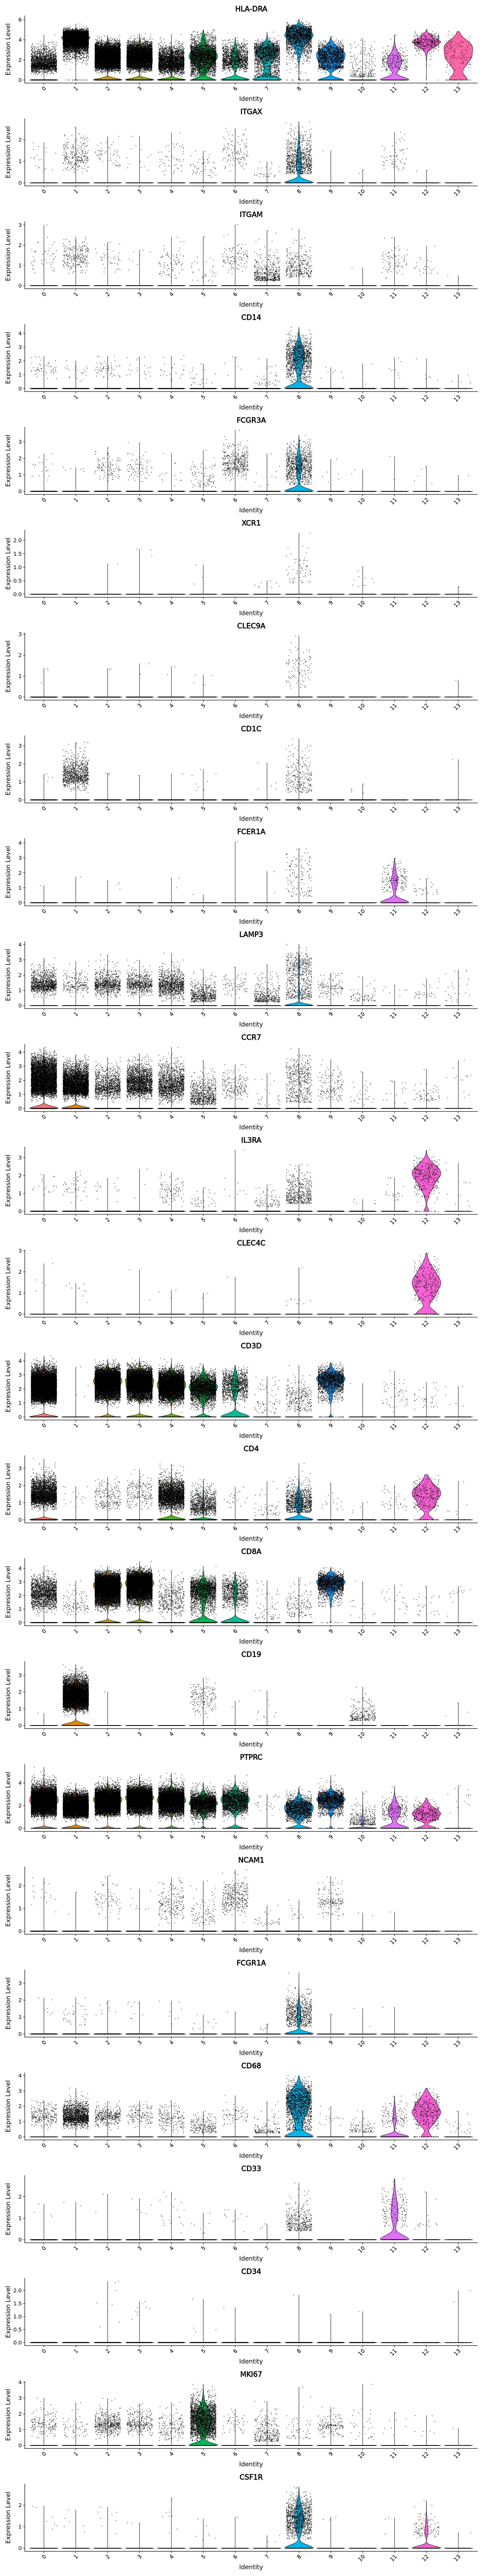

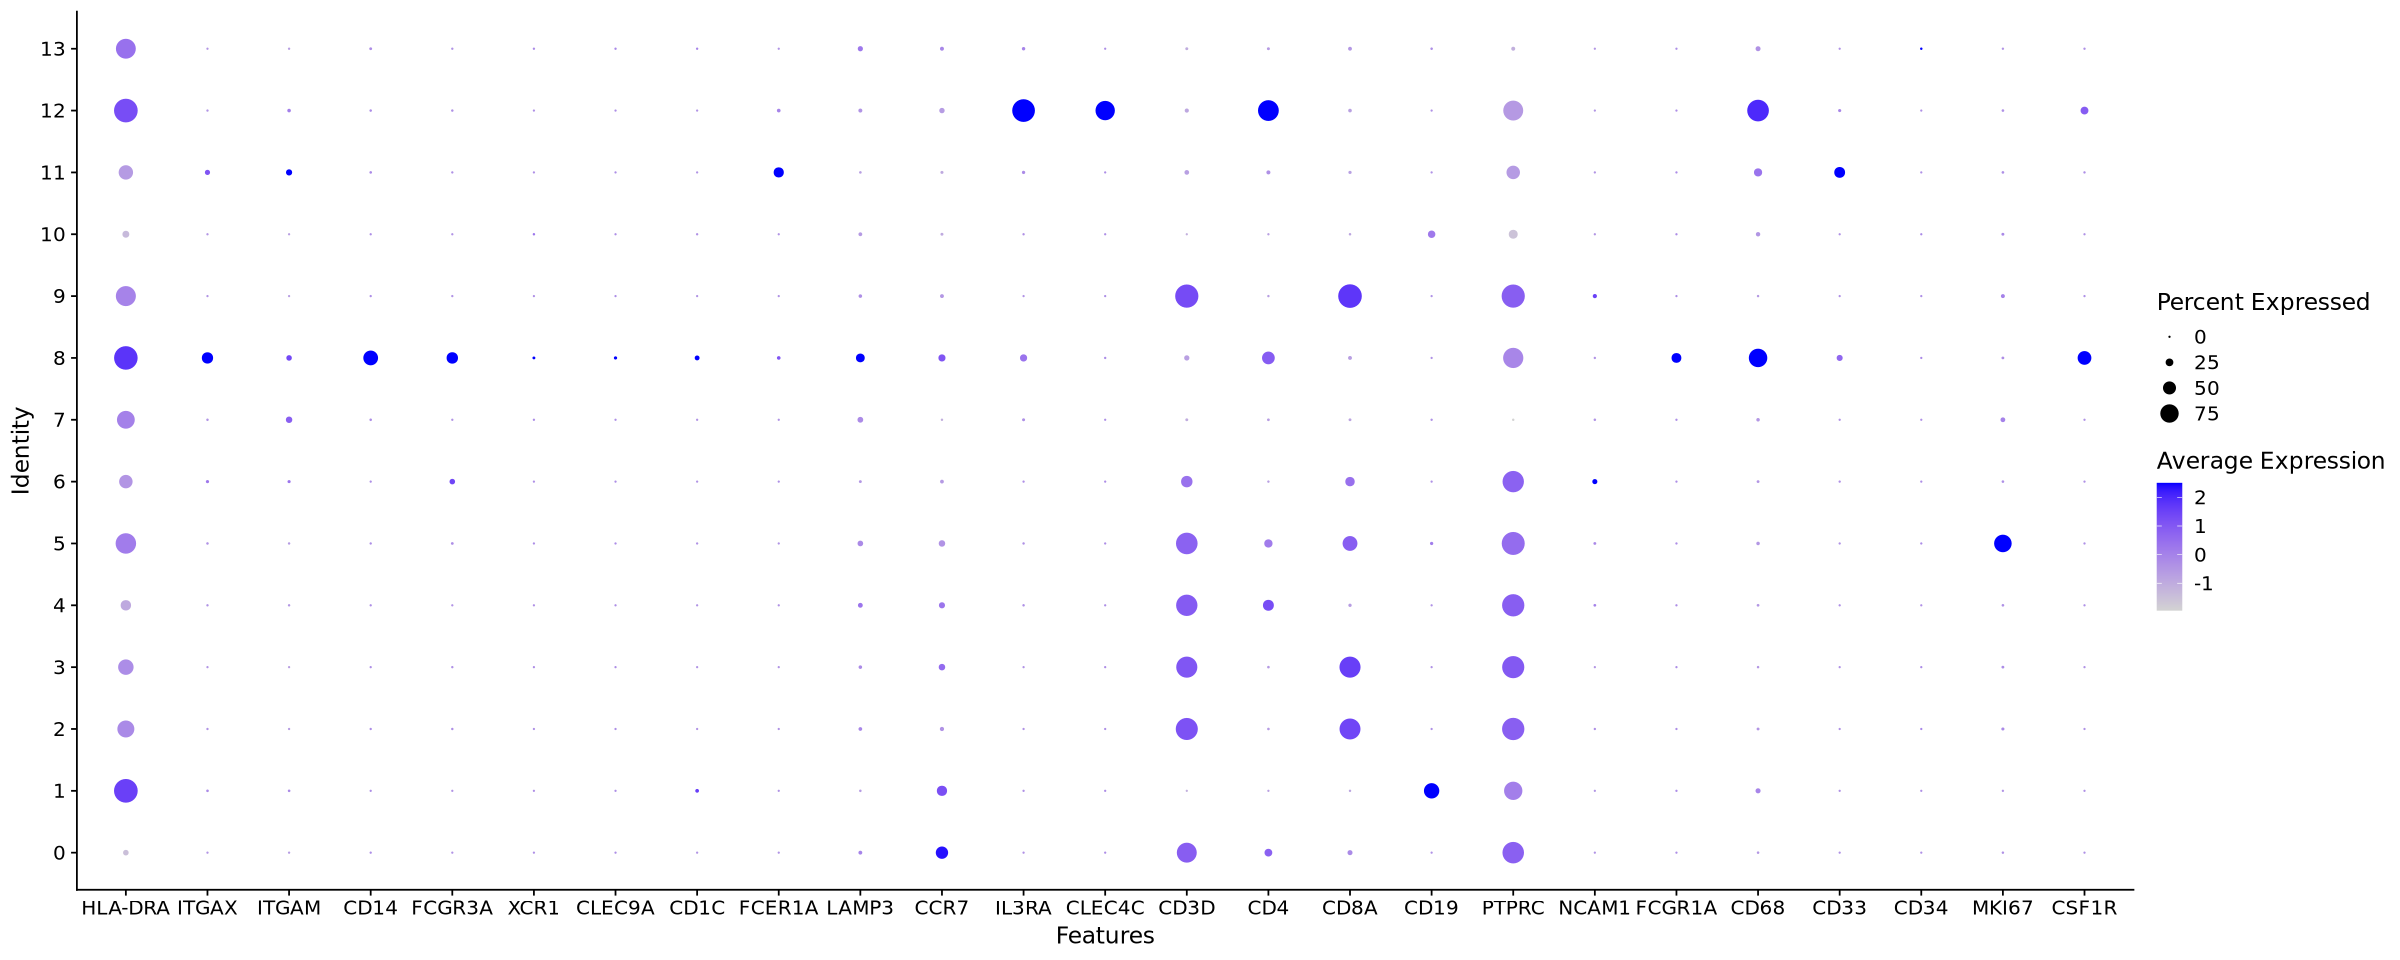

In [33]:
#Same genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(NPC, reduction = "umap", label=TRUE)

options(repr.plot.height=30, repr.plot.width=20)
FeaturePlot(NPC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), order = TRUE)

#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=15)
VlnPlot(NPC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), ncol=1)

#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(NPC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"))

#### From above it looks like cluster 8 is the myeloid cells, now subsetting out this clusters

In [34]:
head(NPC@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE162025_npc_1802_tumor_CTGTTTATCACTCTTA GSE162025  1363        833        
GSE162025_npc_1802_tumor_AACCGCGAGTACGCGA GSE162025  1629        916        
GSE162025_npc_1802_tumor_AGAGCTTAGGCCATAG GSE162025  1467        907        
GSE162025_npc_1802_tumor_CAGCAGCTCGTCACGG GSE162025  1003        614        
GSE162025_npc_1802_tumor_CTCTGGTTCCGCGTTT GSE162025  2210       1229        
GSE162025_npc_1802_tumor_GACGTGCCAAGTCATC GSE162025  1646        952        
                                          sample_type cancer_type patient_id
GSE162025_npc_1802_tumor_CTGTTTATCACTCTTA tumour      NPC         pt-1802   
GSE162025_npc_1802_tumor_AACCGCGAGTACGCGA tumour      NPC         pt-1802   
GSE162025_npc_1802_tumor_AGAGCTTAGGCCATAG tumour      NPC         pt-1802   
GSE162025_npc_1802_tumor_CAGCAGCTCGTCACGG tumour      NPC         pt-1802   
GSE162025_npc_1802_tumor_CTCTGGTTCCGCGTTT tumour      NPC         pt-1802   
GSE162025_npc_1802_tumor_GACGTGCCAAGTCATC tumour      NPC         pt-1802   
                                          sample_id          percent.mt
GSE162025_npc_1802_tumor_CTGTTTATCACTCTTA GSE162025_NPC_1802 12.839325 
GSE162025_npc_1802_tumor_AACCGCGAGTACGCGA GSE162025_NPC_1802 13.075506 
GSE162025_npc_1802_tumor_AGAGCTTAGGCCATAG GSE162025_NPC_1802  7.907294 
GSE162025_npc_1802_tumor_CAGCAGCTCGTCACGG GSE162025_NPC_1802  2.193420 
GSE162025_npc_1802_tumor_CTCTGGTTCCGCGTTT GSE162025_NPC_1802  8.914027 
GSE162025_npc_1802_tumor_GACGTGCCAAGTCATC GSE162025_NPC_1802  7.472661 
                                          RNA_snn_res.0.2 seurat_clusters
GSE162025_npc_1802_tumor_CTGTTTATCACTCTTA 0               0              
GSE162025_npc_1802_tumor_AACCGCGAGTACGCGA 0               0              
GSE162025_npc_1802_tumor_AGAGCTTAGGCCATAG 2               2              
GSE162025_npc_1802_tumor_CAGCAGCTCGTCACGG 3               3              
GSE162025_npc_1802_tumor_CTCTGGTTCCGCGTTT 2               2              
GSE162025_npc_1802_tumor_GACGTGCCAAGTCATC 2               2              
                                          RNA_snn_res.0.4
GSE162025_npc_1802_tumor_CTGTTTATCACTCTTA 1              
GSE162025_npc_1802_tumor_AACCGCGAGTACGCGA 1              
GSE162025_npc_1802_tumor_AGAGCTTAGGCCATAG 0              
GSE162025_npc_1802_tumor_CAGCAGCTCGTCACGG 5              
GSE162025_npc_1802_tumor_CTCTGGTTCCGCGTTT 9              
GSE162025_npc_1802_tumor_GACGTGCCAAGTCATC 9

In [35]:
myeloid_NPC <- subset(NPC, subset = RNA_snn_res.0.2 %in% c("8"))

In [36]:
NPC
myeloid_NPC

An object of class Seurat 
20930 features across 82622 samples within 1 assay 
Active assay: RNA (20930 features, 2000 variable features)
 21 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, data.9, data.10, scale.data
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
20930 features across 2255 samples within 1 assay 
Active assay: RNA (20930 features, 2000 variable features)
 21 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, data.9, data.10, scale.data
 2 dimensional reductions calculated: pca, umap

In [37]:
saveRDS(myeloid_NPC, "/scratch/user/s4436039/scdata/GSE162025/GSE162025_myeloid.RDS")

#### Following the above then need to move entire GSE162025 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE162025/ /QRISdata/Q5935/nikita/scdata/GSE162025
```